In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Chargement des données
file_path = 'Transfert_ new.csv'
transfert_data = pd.read_csv(file_path, sep=';')


In [3]:
# Nettoyage des noms des colonnes
transfert_data.columns = transfert_data.columns.str.strip().str.replace('ï»¿', '')

#  Conversion de la colonne des dates en format datetime
transfert_data['dou'] = pd.to_datetime(transfert_data['dou'], format='%d/%m/%Y')

In [4]:
# Étape 4 : Statistiques descriptives de base pour les montants en devise et en CFA
descriptive_stats = transfert_data[['mdev', 'mcfa']].describe()

In [5]:
# Étape 5 : Agrégation par année et mois pour obtenir les montants totaux
transfert_data['year'] = transfert_data['dou'].dt.year
transfert_data['month'] = transfert_data['dou'].dt.month
monthly_transfers = transfert_data.groupby(['year', 'month']).agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

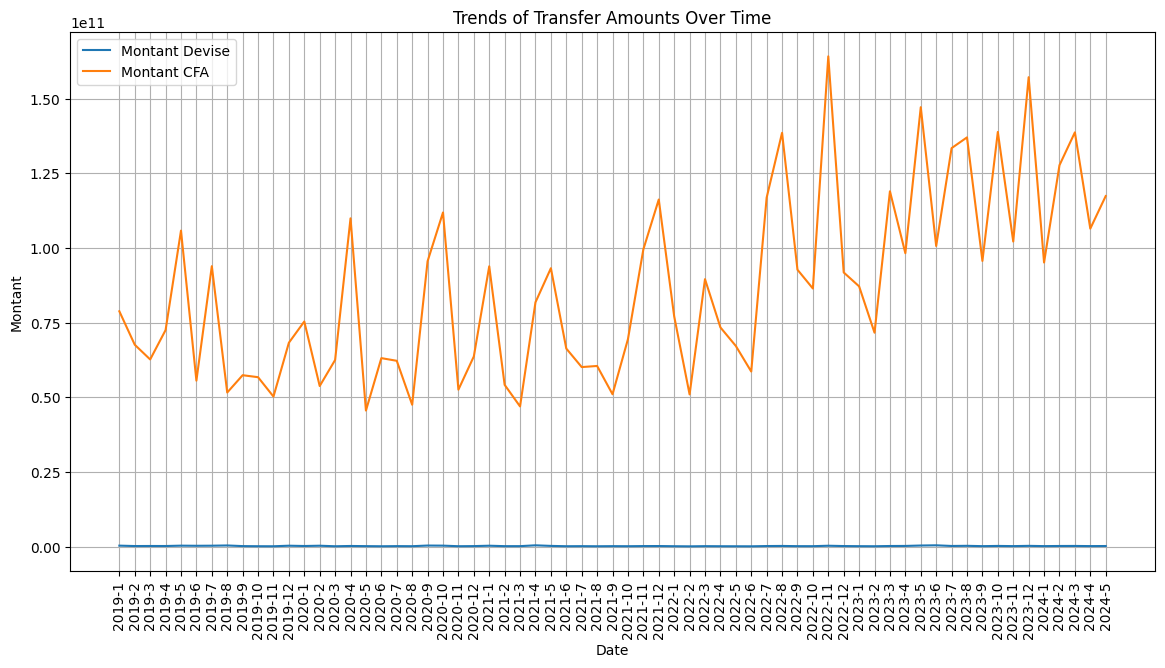

In [6]:
# Étape 6 : Visualisation des tendances au fil du temps
plt.figure(figsize=(14, 7))
plt.plot(monthly_transfers['year'].astype(str) + '-' + monthly_transfers['month'].astype(str), monthly_transfers['mdev'], label='Montant Devise')
plt.plot(monthly_transfers['year'].astype(str) + '-' + monthly_transfers['month'].astype(str), monthly_transfers['mcfa'], label='Montant CFA')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Trends of Transfer Amounts Over Time')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [7]:
# Étape 7 : Identification des bénéficiaires et des ordonnateurs les plus fréquents
top_beneficiaries = transfert_data['nombf'].value_counts().head(10)
top_orderers = transfert_data['nomdo'].value_counts().head(10)

print("\nTop Beneficiaries:")
print(top_beneficiaries)
print("\nTop Orderers:")
print(top_orderers)


Top Beneficiaries:
nombf
SOLPIA KOREA INC                   648
TOTAL OUTRE MER                    635
EQUIPEMENTS AND SERVICES BIA       586
SOLPIA GROUP INCORPORATED          502
XXX                                427
SI LESAFFRE                        361
LOUIS DREYFUS COMPANY SUISSE SA    359
TOTALENERGIES MARKETING AFRIQUE    329
SNETOR CHIMIE                      309
JA DELMAS                          294
Name: count, dtype: int64

Top Orderers:
nomdo
SABODALA GOLD OPERATIONS          6316
DP WORLD DAKAR                    2348
SETER                             1643
SENECOR                           1433
AIR SENEGAL                       1245
CASSIS EQUIPEMENTS SAU            1134
UNIPARCO                          1124
SOCIETE DE CULTURES LEGUMIERES    1038
BATIMAT                           1007
POLYKROME                          991
Name: count, dtype: int64


In [8]:
# Étape 8 : Distribution des devises
currency_code_mapping = {
    1: 'USD',
    86: 'EUR',
    12: 'GBP',
    3: 'JPY',
    4: 'AUD',
    0: 'CFA',
    10: 'CAD',
    74: 'CNY'
}

# Mappage des codes de devises à leurs noms
transfert_data['currency_name'] = transfert_data['dev'].map(currency_code_mapping)

In [9]:
# Distribution des noms de devises
currency_name_distribution = transfert_data['currency_name'].value_counts()

print("\nCurrency Name Distribution:")
print(currency_name_distribution)


Currency Name Distribution:
currency_name
EUR    64537
USD    18324
JPY     1531
GBP      219
AUD      196
CFA      149
CNY       95
CAD       41
Name: count, dtype: int64


In [10]:
# Étape 9 : Calcul des montants totaux transférés par devise
amounts_by_currency = transfert_data.groupby('currency_name').agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

print("\nTotal Amounts Transferred by Currency:")
print(amounts_by_currency)


Total Amounts Transferred by Currency:
  currency_name          mdev          mcfa
0           AUD  4.592049e+06  2.971866e+09
1           CAD  3.257768e+08  1.470817e+09
2           CFA  3.603139e+09  3.603139e+09
3           CNY  2.593977e+07  2.366258e+09
4           EUR  6.729209e+09  4.414072e+12
5           GBP  1.712267e+07  7.904782e+09
6           JPY  2.367195e+07  1.817467e+10
7           USD  2.008800e+09  1.189014e+12


In [11]:
# Étape 10 : Distribution des gestionnaires (nomgest) et des états des transferts (etat)
manager_distribution = transfert_data['nomgest'].value_counts()
state_distribution = transfert_data['etat'].value_counts()

print("\nManager Distribution:")
print(manager_distribution)
print("\nState Distribution:")
print(state_distribution)


Manager Distribution:
nomgest
MIMI DIABY                   10926
ALASSANE SAMBA LY             8479
HAROUNA YARADOU               7376
NDEYE ANNA DIOUF              6575
MAME ISSA GUEYE               5532
SAMBA KHARY NIANG             4940
AUGUSTIN KORY DIOUF           4769
FATOU BOURY NDAO              4047
MAMADOU YAKHAM GUEYE          3415
MOHAMED N NDIAYE              3245
MAMADOU DIAGNE                3211
GUELKAGUEMIA KORIGUIM         3104
MARIEME SOUGOU                3002
ADJA FATOU CISSE EP NIANG     1690
LOUIS SAGNA                   1662
HABY THIOUB                   1650
GAISSIRI NDIAYE KANE          1522
NDEYE OULIMATA BOYE           1337
ABIBOU BEYE                   1230
KHADIDIATOU MBENGUE           1091
FATIMA CHAOUI                  958
PIERRE NDAW                    905
OULIMATA NDIAYE                899
KHADY NDIAYE BA                889
FATIMATA ZARA HAIDARA          860
MAME NGONE GAYE                685
CHEIKH TALIBOUYA NDIAYE        434
ZHENBANG BAO            

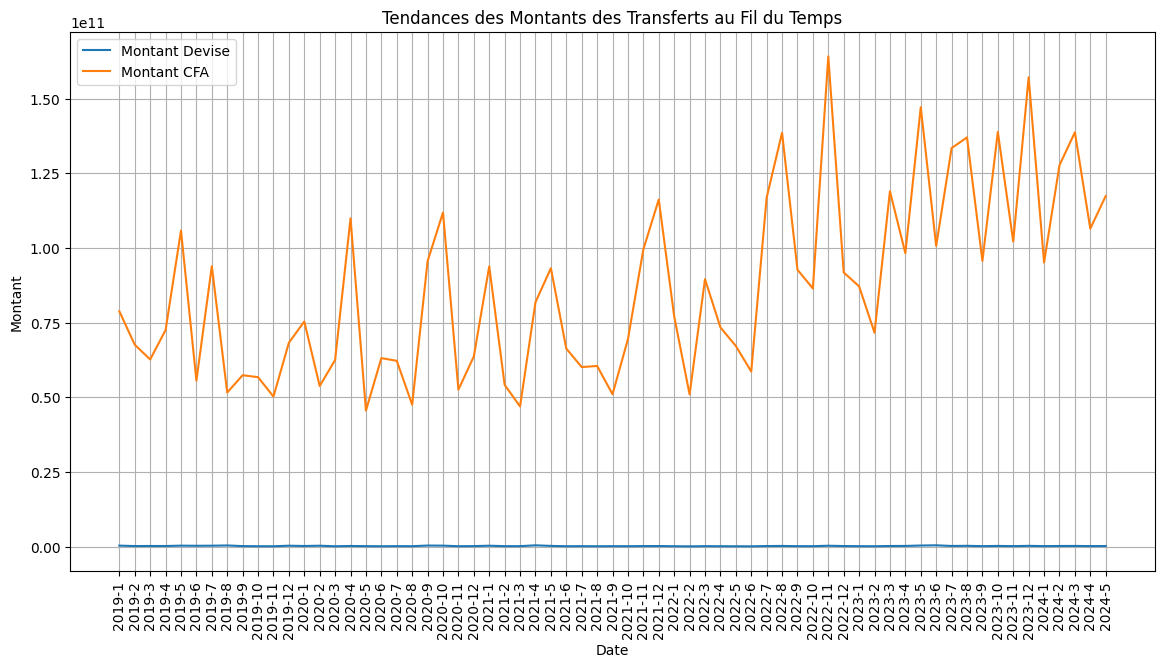

In [12]:
# Étape 6 : Visualisation des tendances au fil du temps
plt.figure(figsize=(14, 7))
plt.plot(monthly_transfers['year'].astype(str) + '-' + monthly_transfers['month'].astype(str), monthly_transfers['mdev'], label='Montant Devise')
plt.plot(monthly_transfers['year'].astype(str) + '-' + monthly_transfers['month'].astype(str), monthly_transfers['mcfa'], label='Montant CFA')
plt.xlabel('Date')
plt.ylabel('Montant')
plt.title('Tendances des Montants des Transferts au Fil du Temps')
plt.legend()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

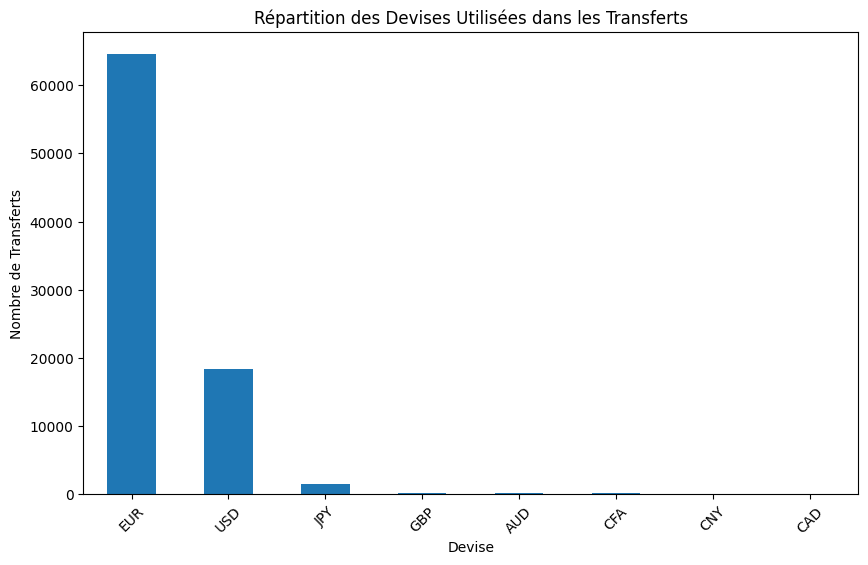

In [13]:
# Visualisation de la répartition des devises
plt.figure(figsize=(10, 6))
currency_name_distribution.plot(kind='bar')
plt.xlabel('Devise')
plt.ylabel('Nombre de Transferts')
plt.title('Répartition des Devises Utilisées dans les Transferts')
plt.xticks(rotation=45)
plt.show()

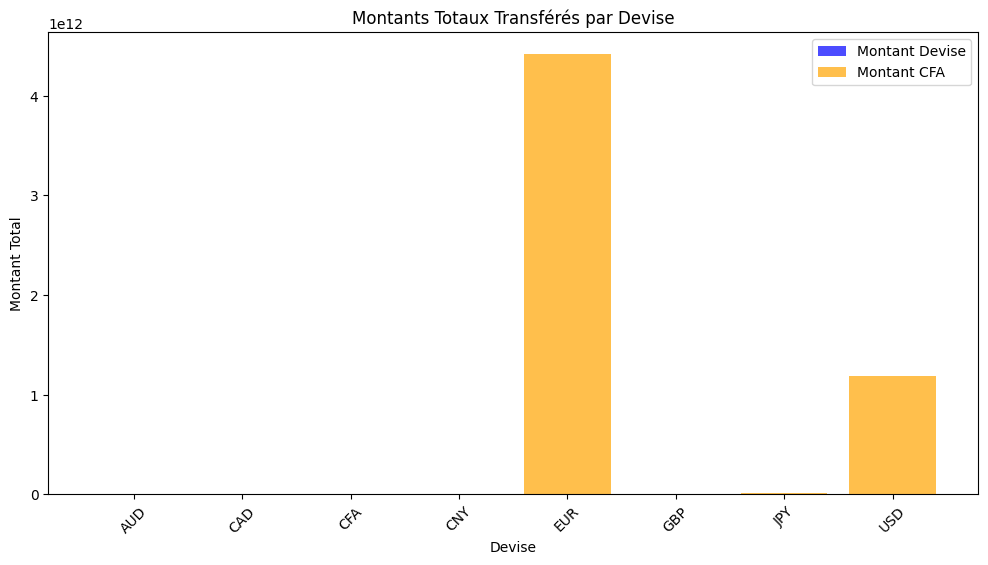

In [14]:
# Visualisation des montants transférés par devise
plt.figure(figsize=(12, 6))
plt.bar(amounts_by_currency['currency_name'], amounts_by_currency['mdev'], color='blue', alpha=0.7, label='Montant Devise')
plt.bar(amounts_by_currency['currency_name'], amounts_by_currency['mcfa'], color='orange', alpha=0.7, label='Montant CFA')
plt.xlabel('Devise')
plt.ylabel('Montant Total')
plt.title('Montants Totaux Transférés par Devise')
plt.legend()
plt.xticks(rotation=45)
plt.show()

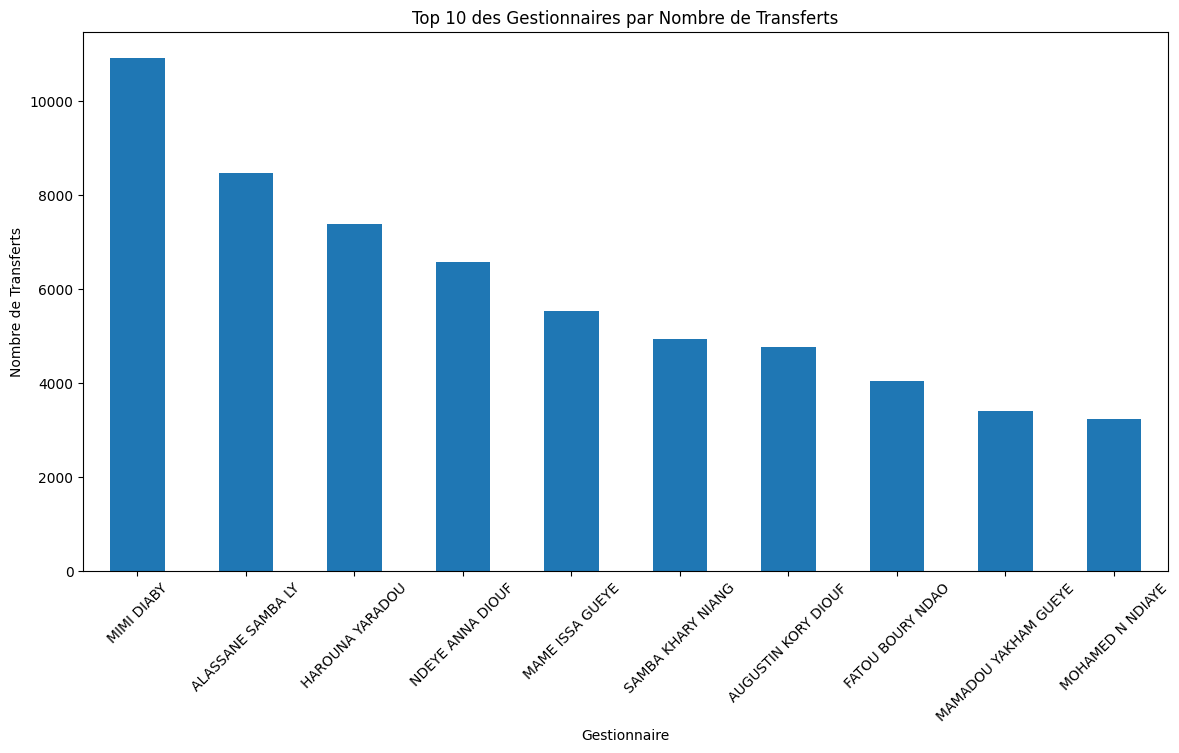

In [15]:
# Visualisation de la distribution des gestionnaires
plt.figure(figsize=(14, 7))
manager_distribution.head(10).plot(kind='bar')
plt.xlabel('Gestionnaire')
plt.ylabel('Nombre de Transferts')
plt.title('Top 10 des Gestionnaires par Nombre de Transferts')
plt.xticks(rotation=45)
plt.show()

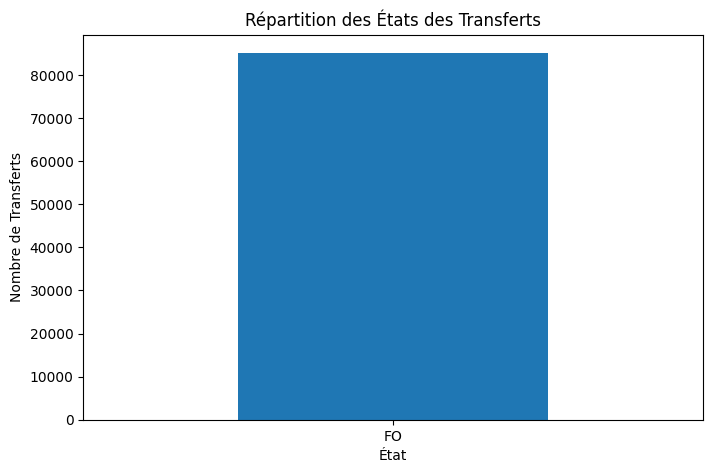

In [16]:
# Visualisation de la distribution des états des transferts
plt.figure(figsize=(8, 5))
state_distribution.plot(kind='bar')
plt.xlabel('État')
plt.ylabel('Nombre de Transferts')
plt.title('Répartition des États des Transferts')
plt.xticks(rotation=0)
plt.show()

In [17]:
# Extraction des composantes temporelles
transfert_data['month'] = transfert_data['dou'].dt.month
transfert_data['quarter'] = transfert_data['dou'].dt.to_period('Q')


# Agrégation des données par mois
monthly_totals = transfert_data.groupby('month').agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

# Agrégation des données par trimestre
quarterly_totals = transfert_data.groupby('quarter').agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()


Tendance saisonniere

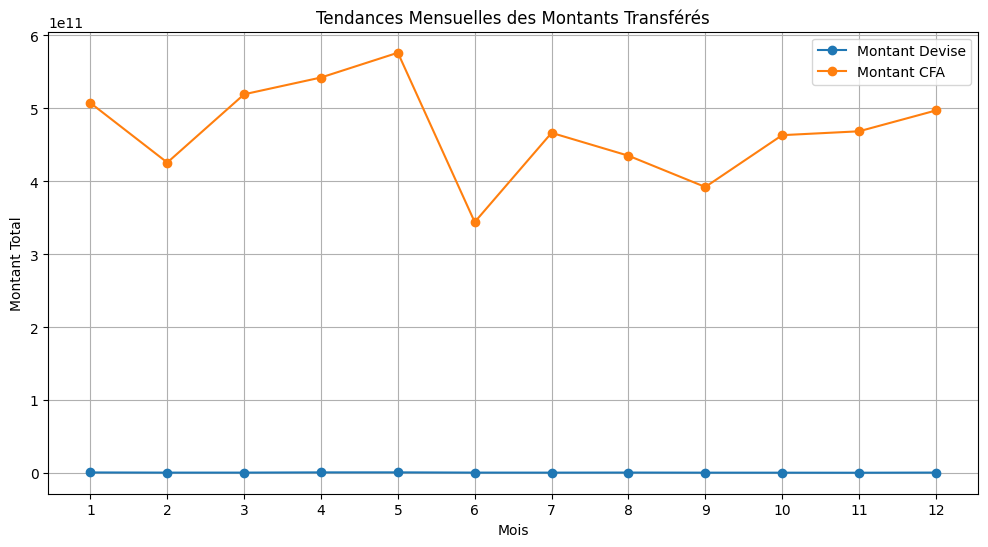

In [18]:
# Visualisation des tendances mensuelles
plt.figure(figsize=(12, 6))
plt.plot(monthly_totals['month'], monthly_totals['mdev'], marker='o', label='Montant Devise')
plt.plot(monthly_totals['month'], monthly_totals['mcfa'], marker='o', label='Montant CFA')
plt.xlabel('Mois')
plt.ylabel('Montant Total')
plt.title('Tendances Mensuelles des Montants Transférés')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()

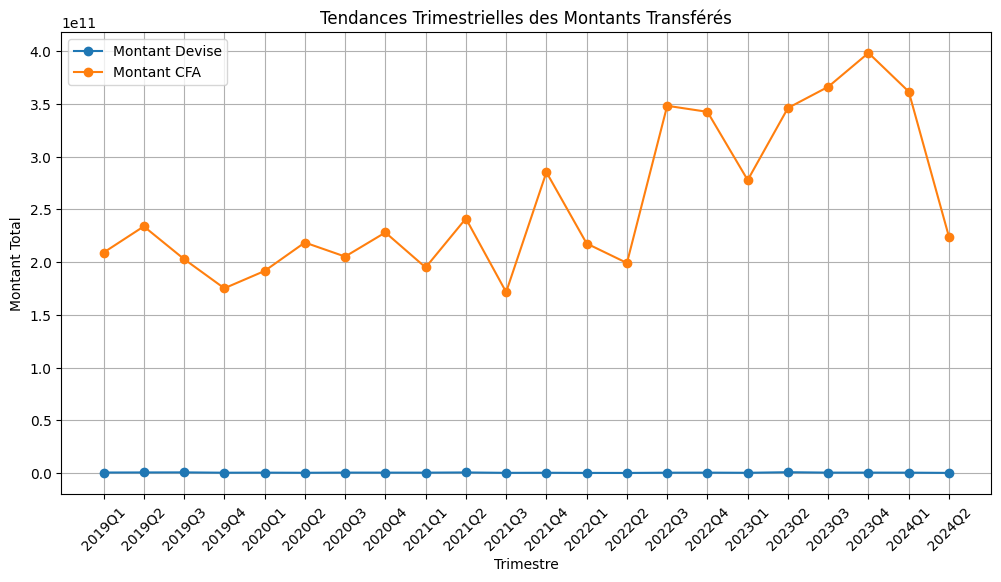

In [19]:
# Visualisation des tendances trimestrielles
plt.figure(figsize=(12, 6))
plt.plot(quarterly_totals['quarter'].astype(str), quarterly_totals['mdev'], marker='o', label='Montant Devise')
plt.plot(quarterly_totals['quarter'].astype(str), quarterly_totals['mcfa'], marker='o', label='Montant CFA')
plt.xlabel('Trimestre')
plt.ylabel('Montant Total')
plt.title('Tendances Trimestrielles des Montants Transférés')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

Focus client

In [20]:
# Étape 5 : Analyse des montants transférés par les principaux ordonnateurs
orderer_totals = transfert_data[transfert_data['nomdo'].isin(top_orderers.index)].groupby('nomdo').agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

# Étape 6 : Analyse des montants reçus par les principaux bénéficiaires
beneficiary_totals = transfert_data[transfert_data['nombf'].isin(top_beneficiaries.index)].groupby('nombf').agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

print("\nMontants transférés par les principaux ordonnateurs :")
print(orderer_totals)

print("\nMontants reçus par les principaux bénéficiaires :")
print(beneficiary_totals)


Montants transférés par les principaux ordonnateurs :
                            nomdo          mdev          mcfa
0                     AIR SENEGAL  8.475017e+07  5.342167e+10
1                         BATIMAT  1.329267e+07  8.634335e+09
2          CASSIS EQUIPEMENTS SAU  1.894976e+07  1.239527e+10
3                  DP WORLD DAKAR  4.000866e+08  2.588561e+11
4                       POLYKROME  1.770693e+07  1.143944e+10
5        SABODALA GOLD OPERATIONS  3.947978e+08  2.368263e+11
6                         SENECOR  2.140917e+08  1.278976e+11
7                           SETER  4.468559e+07  2.930962e+10
8  SOCIETE DE CULTURES LEGUMIERES  3.177367e+07  2.077755e+10
9                        UNIPARCO  4.374757e+07  2.806711e+10

Montants reçus par les principaux bénéficiaires :
                             nombf          mdev          mcfa
0     EQUIPEMENTS AND SERVICES BIA  6.678402e+07  4.008606e+10
1                        JA DELMAS  2.488658e+07  1.632360e+10
2  LOUIS DREYFUS COMPAN

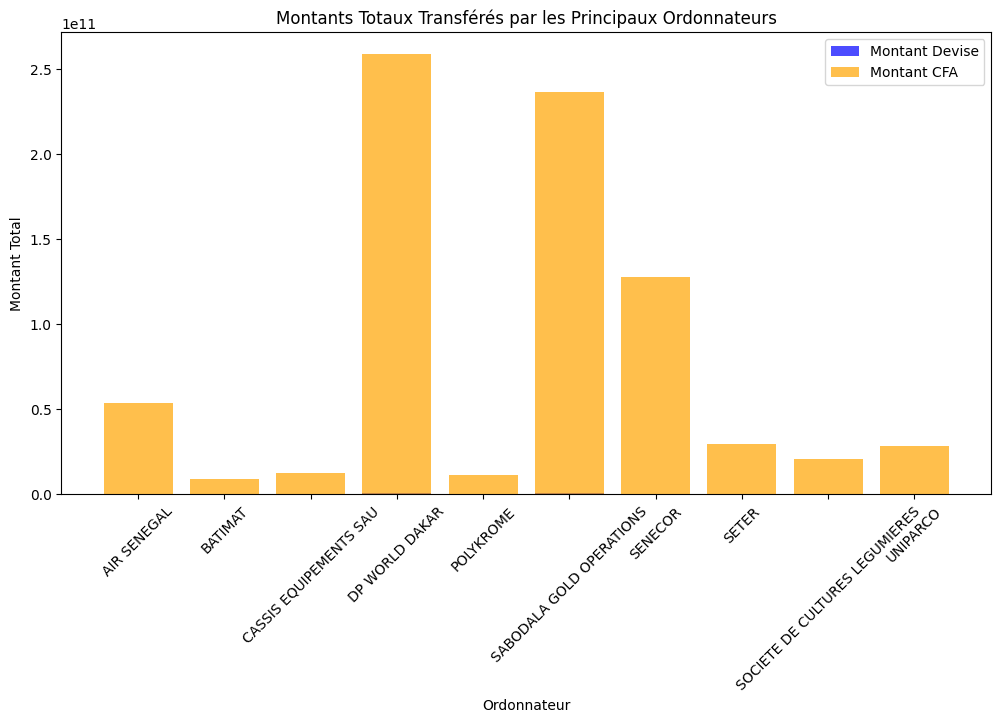

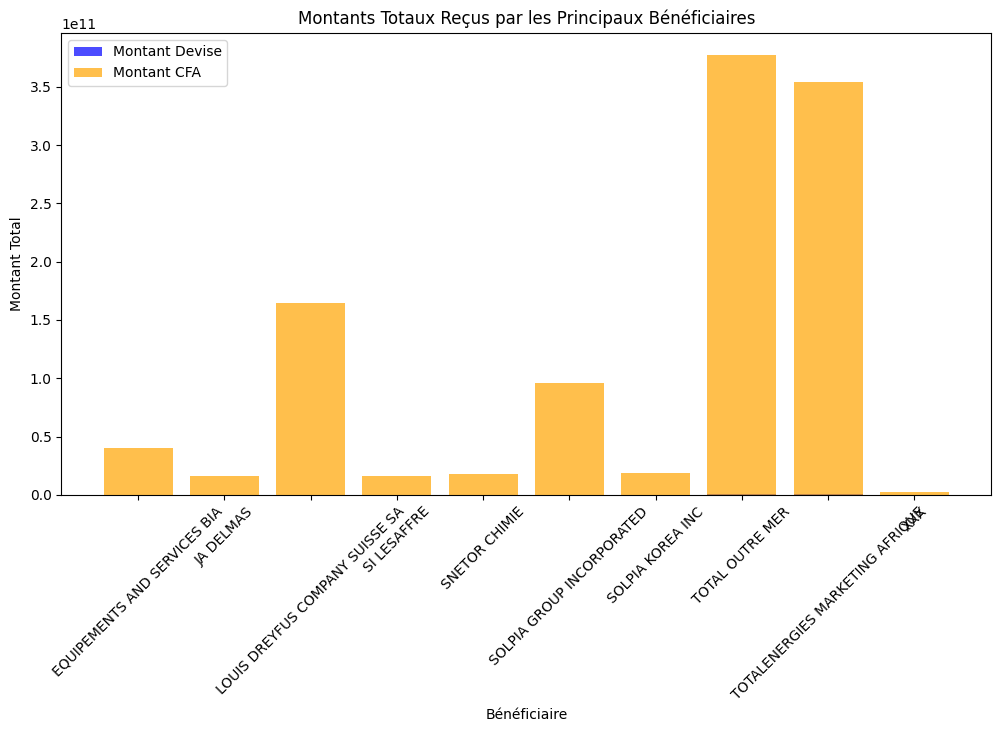

In [21]:
# Étape 7 : Visualisation des résultats
plt.figure(figsize=(12, 6))
plt.bar(orderer_totals['nomdo'], orderer_totals['mdev'], color='blue', alpha=0.7, label='Montant Devise')
plt.bar(orderer_totals['nomdo'], orderer_totals['mcfa'], color='orange', alpha=0.7, label='Montant CFA')
plt.xlabel('Ordonnateur')
plt.ylabel('Montant Total')
plt.title('Montants Totaux Transférés par les Principaux Ordonnateurs')
plt.legend()
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(beneficiary_totals['nombf'], beneficiary_totals['mdev'], color='blue', alpha=0.7, label='Montant Devise')
plt.bar(beneficiary_totals['nombf'], beneficiary_totals['mcfa'], color='orange', alpha=0.7, label='Montant CFA')
plt.xlabel('Bénéficiaire')
plt.ylabel('Montant Total')
plt.title('Montants Totaux Reçus par les Principaux Bénéficiaires')
plt.legend()
plt.xticks(rotation=45)
plt.show()

Analyse détaillée des ordonnateurs principaux

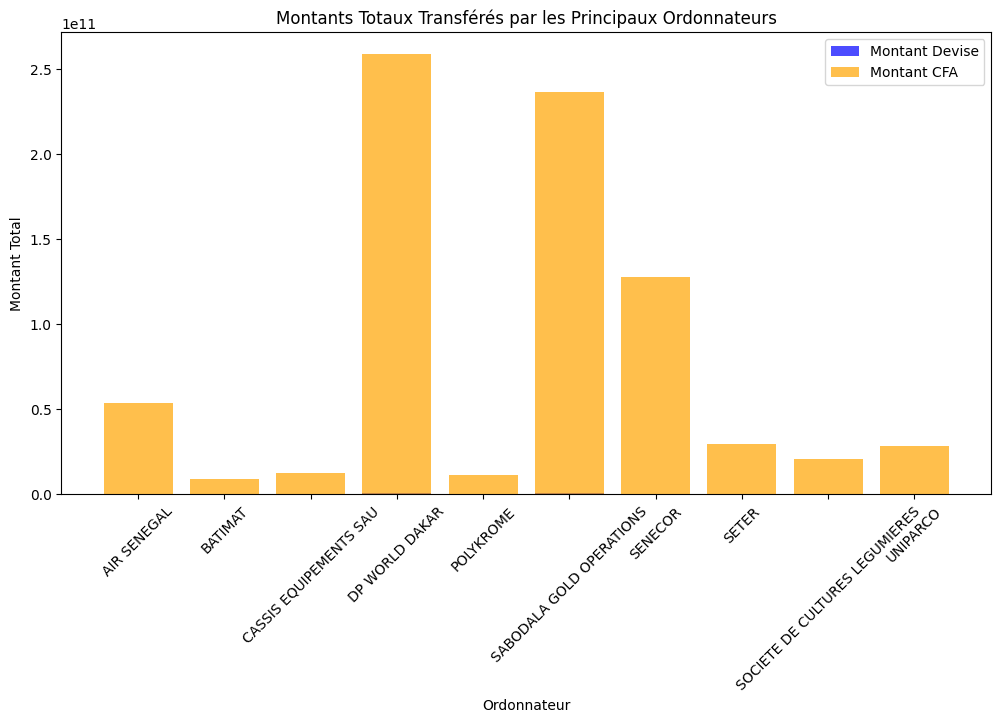

In [22]:
# Étape 6 : Analyse des tendances temporelles pour chaque ordonnateur
orderer_trends = transfert_data[transfert_data['nomdo'].isin(top_orderers.index)].groupby(['nomdo', 'dou']).agg({'mdev': 'sum', 'mcfa': 'sum'}).reset_index()

# Étape 7 : Visualisation des montants transférés par les principaux ordonnateurs
plt.figure(figsize=(12, 6))
plt.bar(orderer_totals['nomdo'], orderer_totals['mdev'], color='blue', alpha=0.7, label='Montant Devise')
plt.bar(orderer_totals['nomdo'], orderer_totals['mcfa'], color='orange', alpha=0.7, label='Montant CFA')
plt.xlabel('Ordonnateur')
plt.ylabel('Montant Total')
plt.title('Montants Totaux Transférés par les Principaux Ordonnateurs')
plt.legend()
plt.xticks(rotation=45)
plt.show()


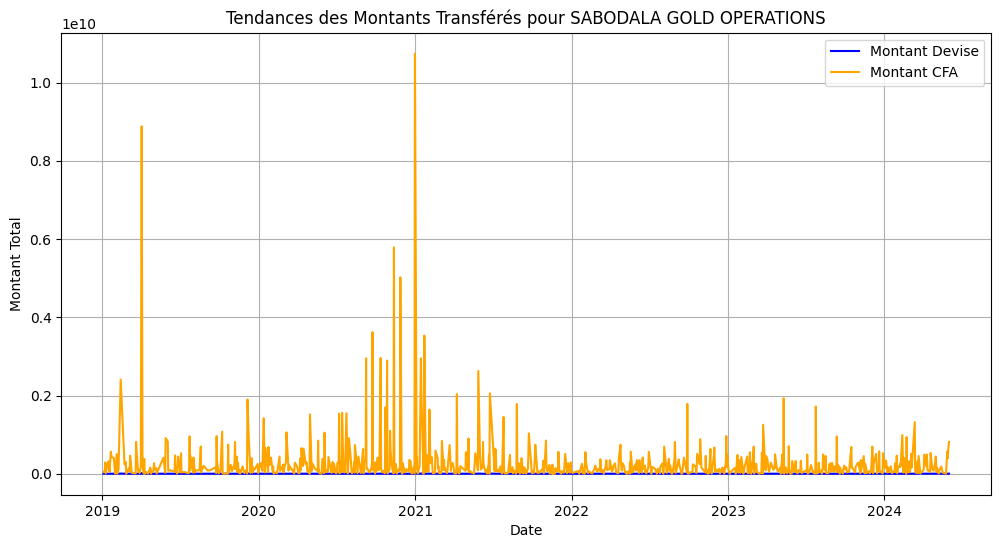

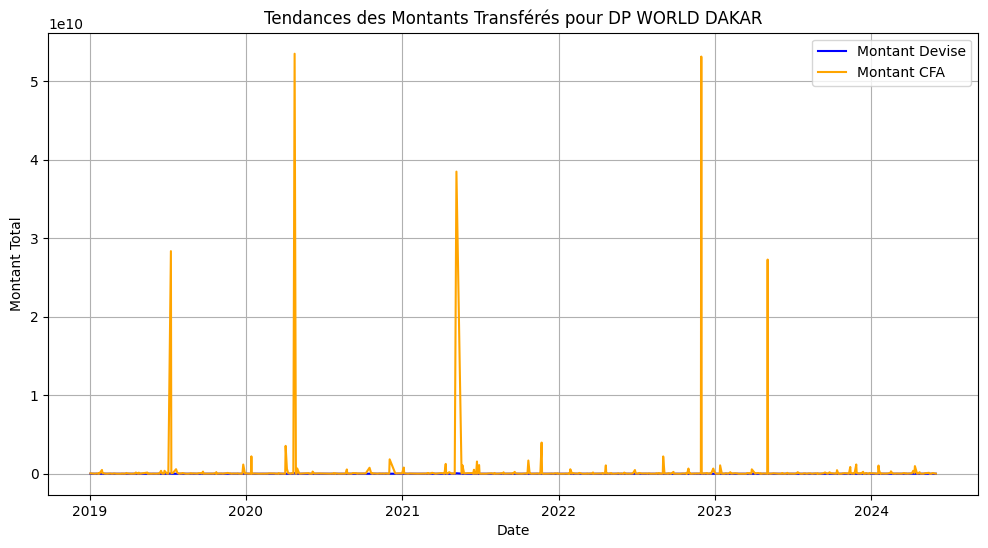

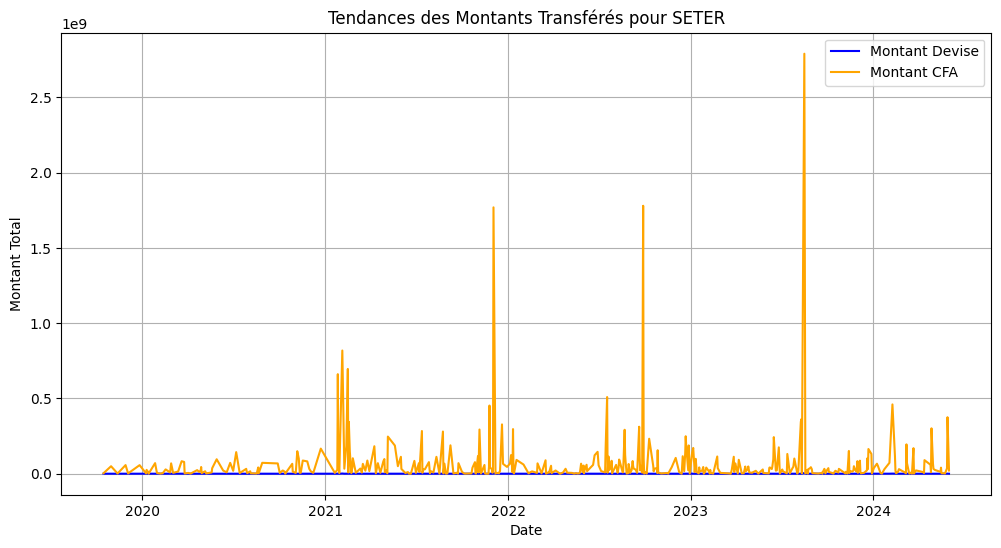

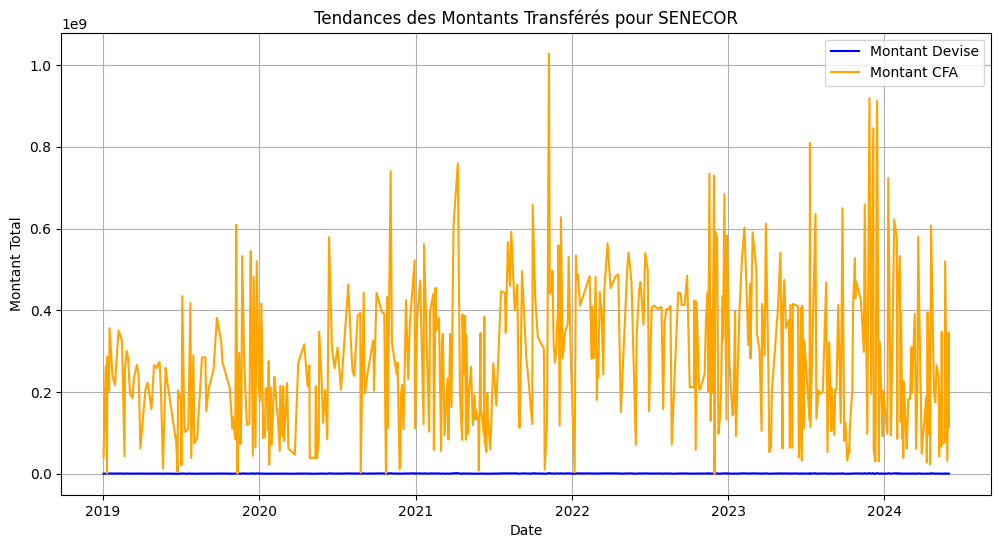

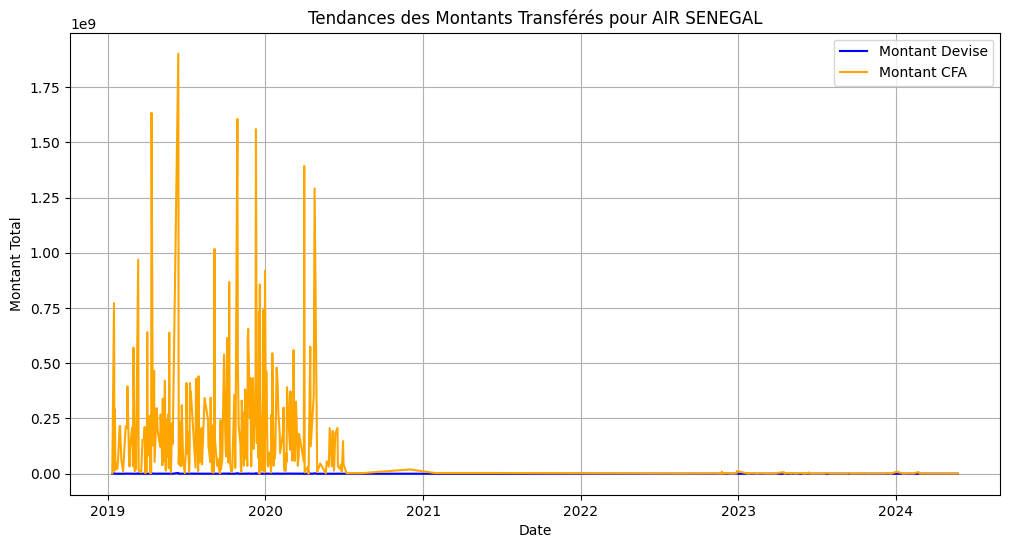

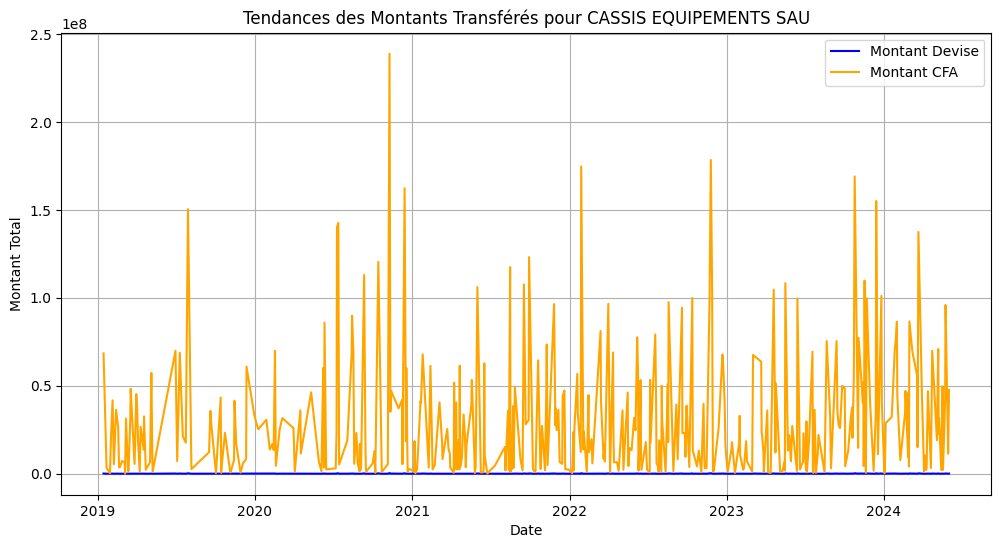

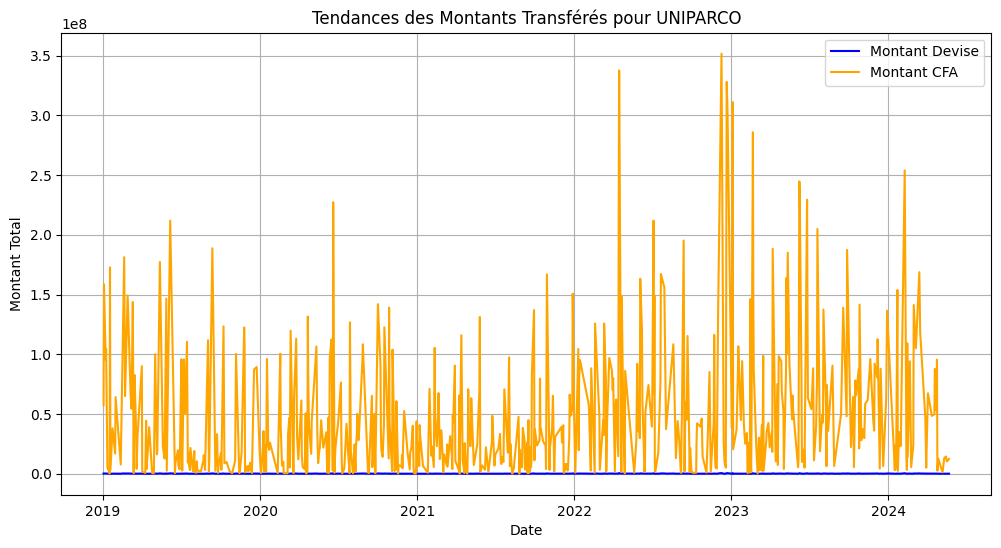

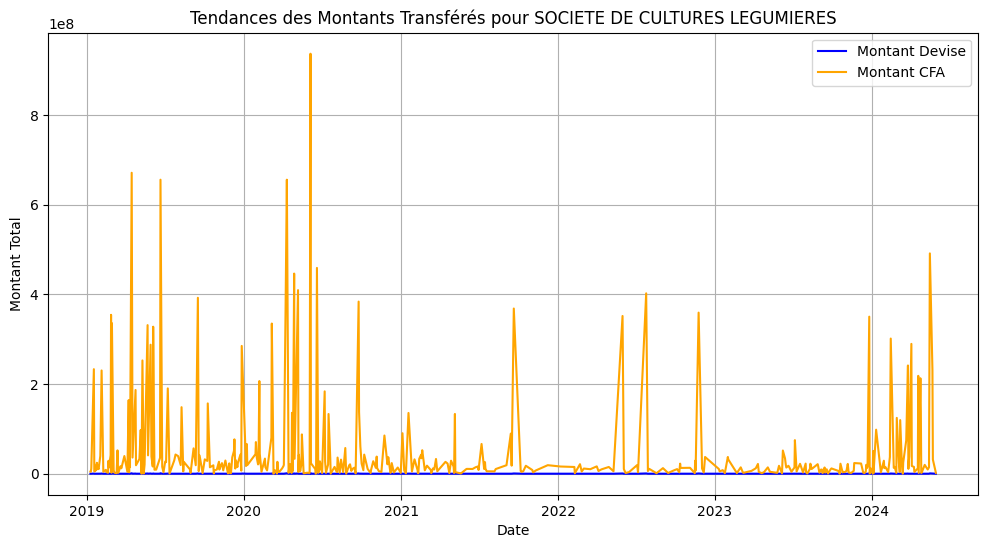

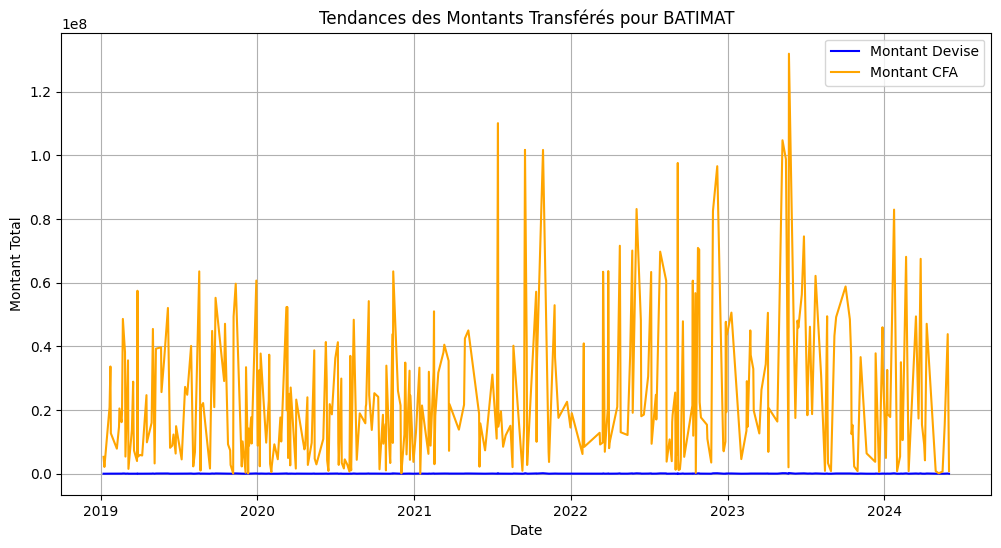

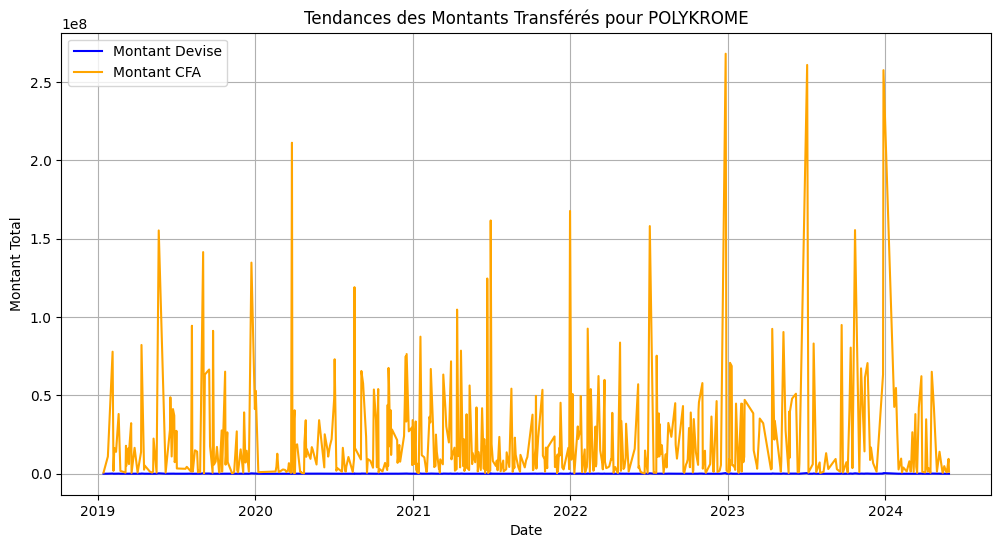

In [23]:
# Visualisation des tendances temporelles pour chaque ordonnateur
for orderer in top_orderers.index:
    orderer_data = orderer_trends[orderer_trends['nomdo'] == orderer]
    plt.figure(figsize=(12, 6))
    plt.plot(orderer_data['dou'], orderer_data['mdev'], label='Montant Devise', color='blue')
    plt.plot(orderer_data['dou'], orderer_data['mcfa'], label='Montant CFA', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Montant Total')
    plt.title(f'Tendances des Montants Transférés pour {orderer}')
    plt.legend()
    plt.grid(True)
    plt.show()

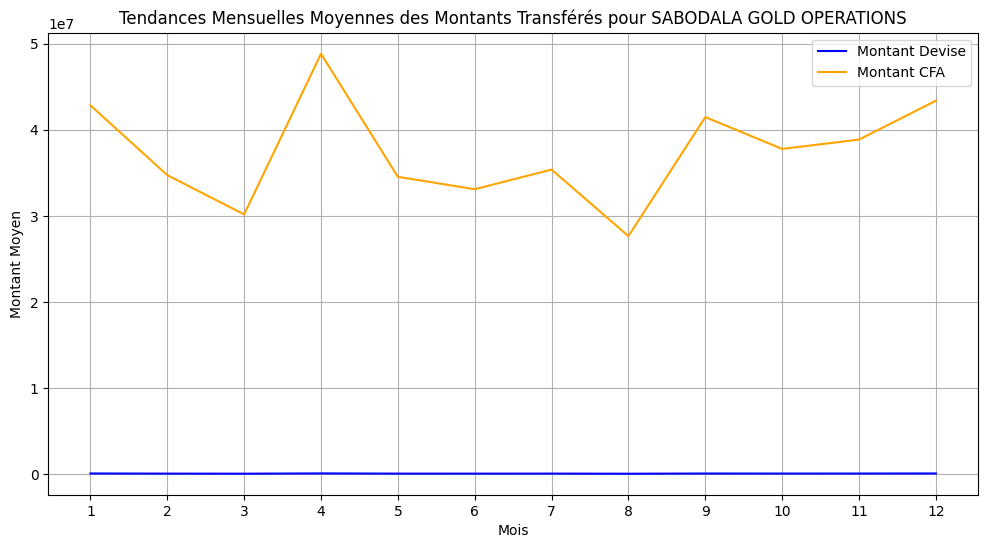

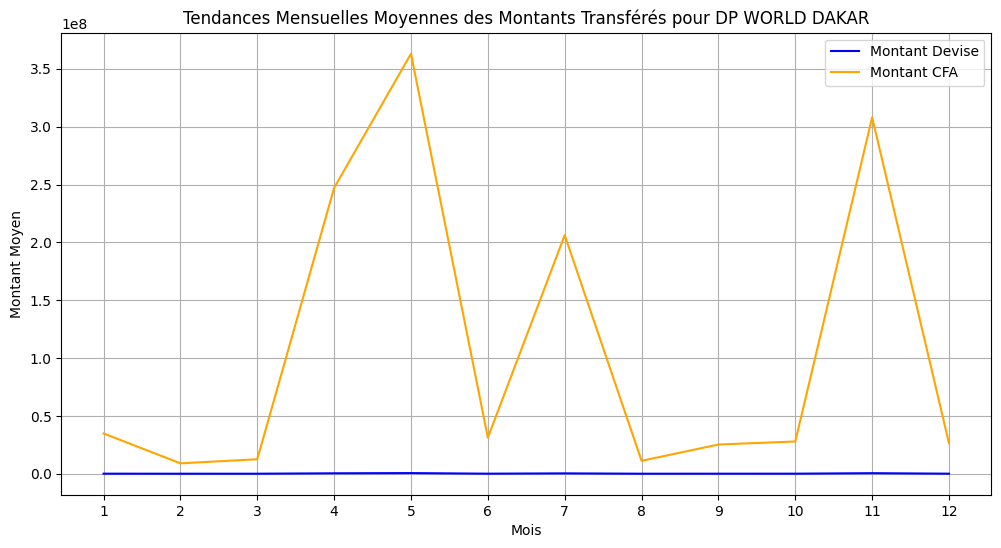

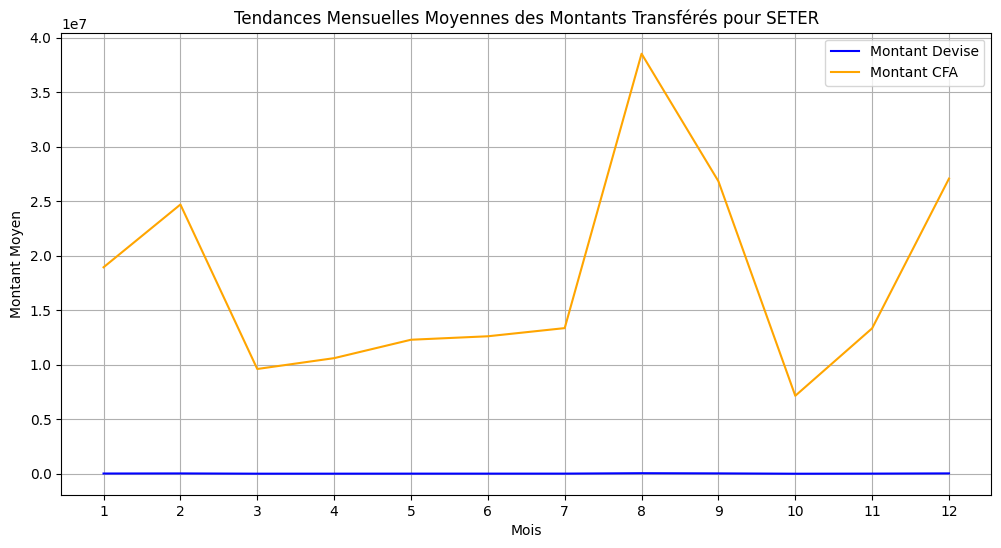

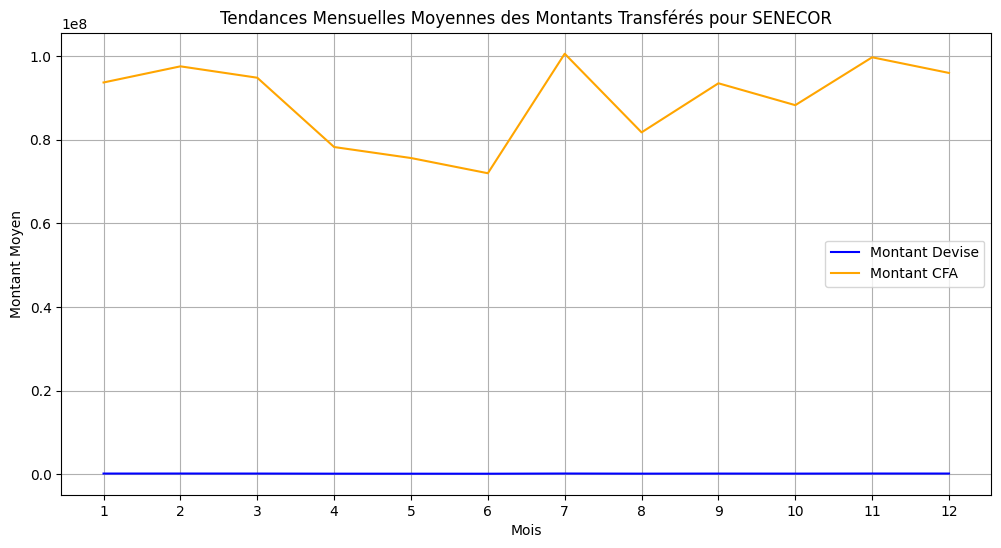

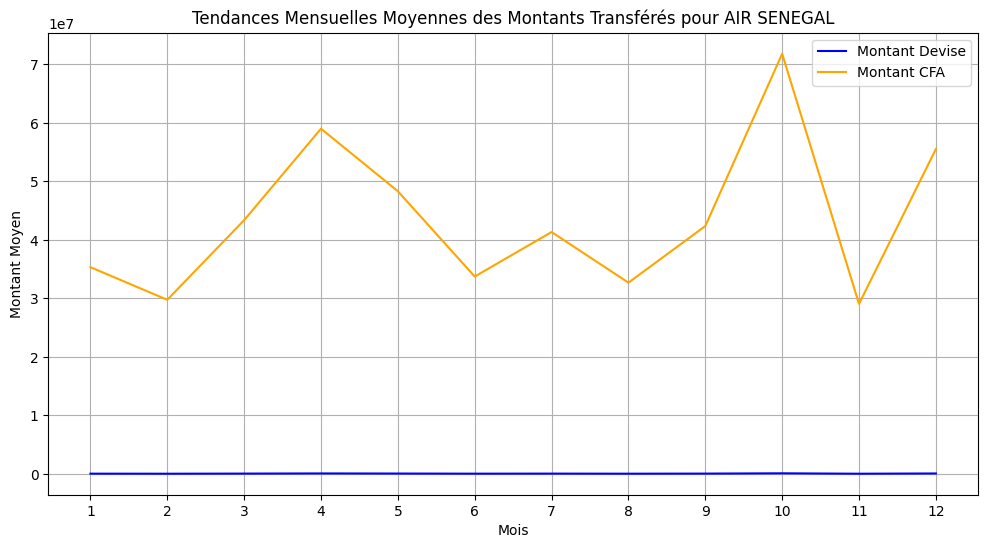

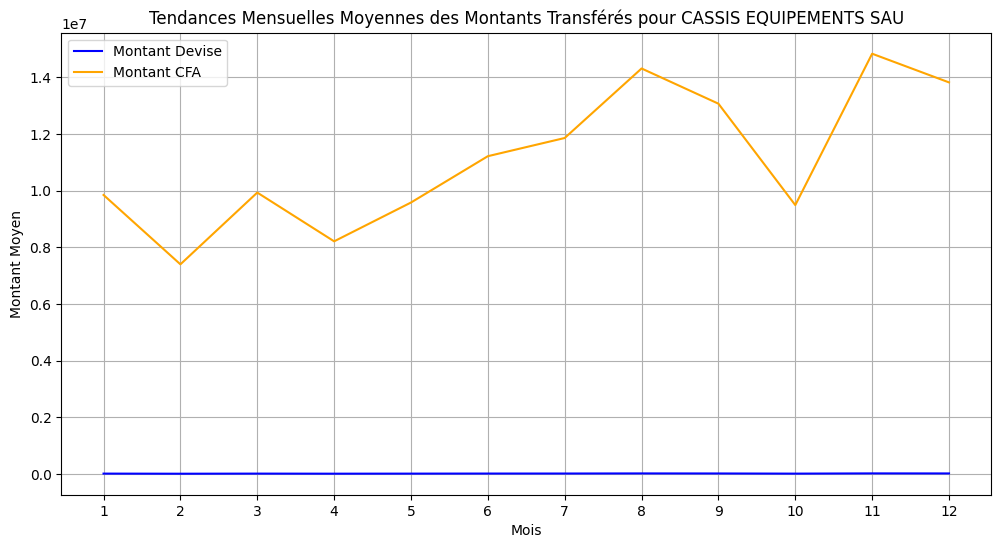

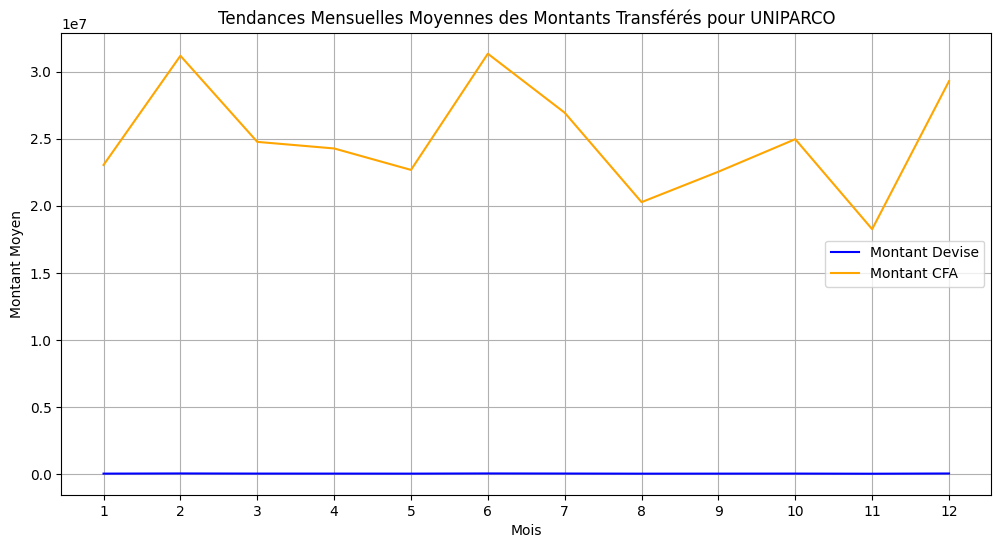

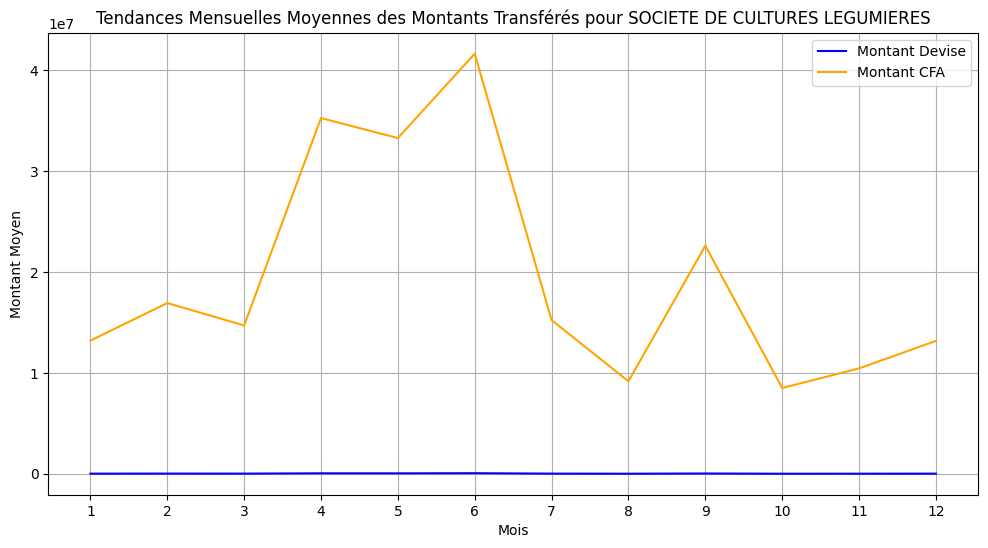

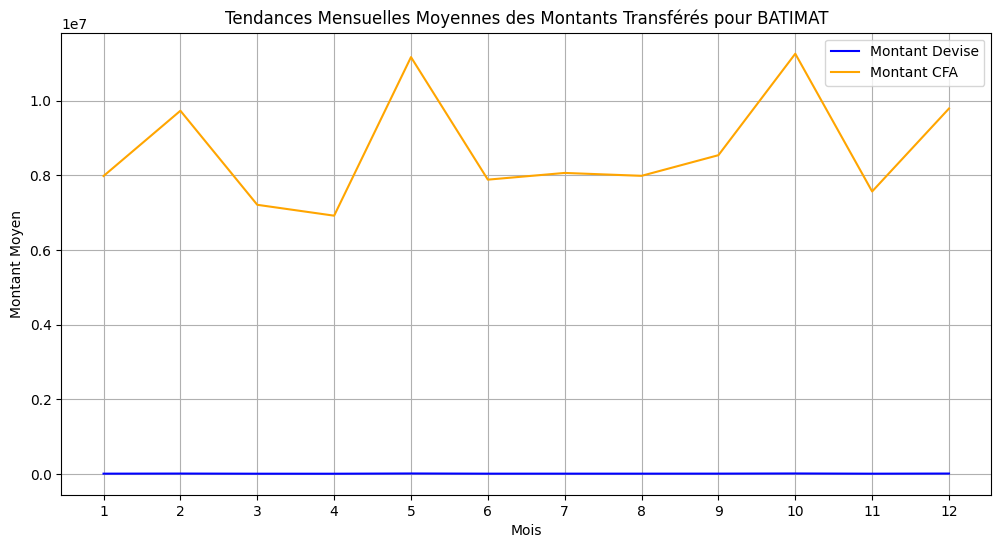

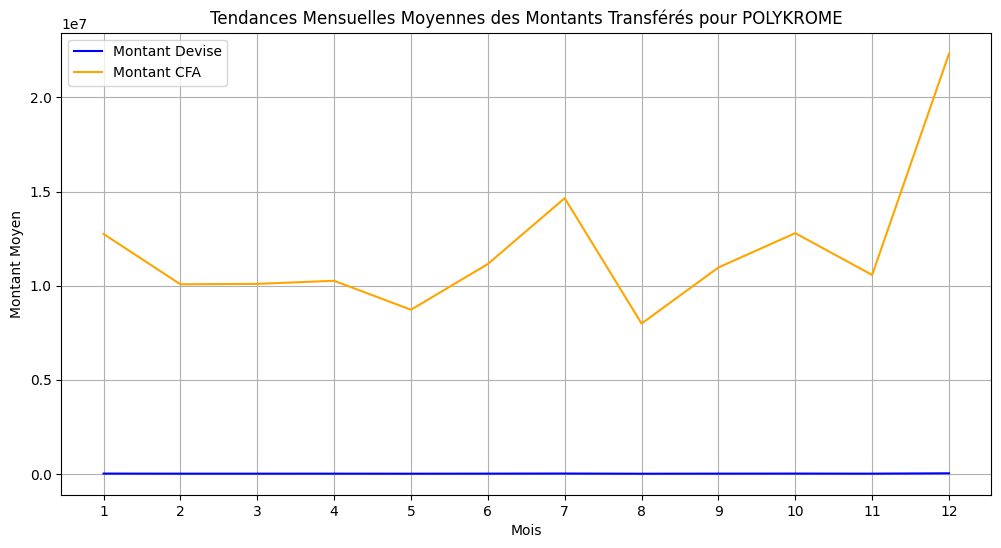

In [24]:
# Étape 5 : Agrégation des données par mois pour chaque ordonnateur
transfert_data['month'] = transfert_data['dou'].dt.month
orderer_monthly_trends = transfert_data[transfert_data['nomdo'].isin(top_orderers.index)].groupby(['nomdo', 'month']).agg({'mdev': 'mean', 'mcfa': 'mean'}).reset_index()

# Étape 6 : Visualisation des tendances mensuelles moyennes pour chaque ordonnateur
for orderer in top_orderers.index:
    orderer_data = orderer_monthly_trends[orderer_monthly_trends['nomdo'] == orderer]
    plt.figure(figsize=(12, 6))
    plt.plot(orderer_data['month'], orderer_data['mdev'], label='Montant Devise', color='blue')
    plt.plot(orderer_data['month'], orderer_data['mcfa'], label='Montant CFA', color='orange')
    plt.xlabel('Mois')
    plt.ylabel('Montant Moyen')
    plt.title(f'Tendances Mensuelles Moyennes des Montants Transférés pour {orderer}')
    plt.legend()
    plt.grid(True)
    plt.xticks(range(1, 13))
    plt.show()

In [25]:
# Étape 5 : Identification des bénéficiaires des principaux ordonnateurs
top_orderers_data = transfert_data[transfert_data['nomdo'].isin(top_orderers.index)]

# Agrégation des montants transférés et du nombre d'opérations aux bénéficiaires par les principaux ordonnateurs
beneficiaries_of_top_orderers = top_orderers_data.groupby(['nomdo', 'nombf']).agg(
    total_mdev=('mdev', 'sum'),
    total_mcfa=('mcfa', 'sum'),
    operation_count=('nombf', 'size')
).reset_index()

print("\nBénéficiaires des principaux ordonnateurs avec montants transférés et nombre d'opérations :")
print(beneficiaries_of_top_orderers)


Bénéficiaires des principaux ordonnateurs avec montants transférés et nombre d'opérations :
            nomdo                                nombf  total_mdev  \
0     AIR SENEGAL                          ABEL AUDREY      600.00   
1     AIR SENEGAL                          ABIBATOU SY      243.00   
2     AIR SENEGAL                            ABOTOA SA    16462.17   
3     AIR SENEGAL                             ABY GAYE      600.00   
4     AIR SENEGAL                           ADAMA SEYE      320.00   
...           ...                                  ...         ...   
3372     UNIPARCO  ZHANGJIAGANG GUOCHAO GLASS PRODUCTS   155520.00   
3373     UNIPARCO       ZHANGJIAGANG VICTOR IMPORT AND     3320.00   
3374     UNIPARCO          ZHEJIANG JM INDUSTRY CO LTD   340550.00   
3375     UNIPARCO     ZHENJIANG GAOPENG PHARMACEUTICAL    40800.00   
3376     UNIPARCO  ZHENJIANG GAOPENG PHARMACEUTICAL CO    10200.00   

        total_mcfa  operation_count  
0     3.935742e+05          

In [26]:
# Étape 6 : Identification des principaux bénéficiaires par montant et par nombre d'opérations
top_beneficiaries_by_amount = beneficiaries_of_top_orderers.sort_values(by='total_mcfa', ascending=False).groupby('nomdo').head(5)
top_beneficiaries_by_operations = beneficiaries_of_top_orderers.sort_values(by='operation_count', ascending=False).groupby('nomdo').head(5)

print("\nTop Bénéficiaires par Montant :")
print(top_beneficiaries_by_amount)

print("\nTop Bénéficiaires par Nombre d'Opérations :")
print(top_beneficiaries_by_operations)


Top Bénéficiaires par Montant :
                               nomdo                              nombf  \
1043                  DP WORLD DAKAR                   DP WORLD ENAF BV   
2458                         SENECOR          SOLPIA GROUP INCORPORATED   
1836        SABODALA GOLD OPERATIONS       EQUIPEMENTS AND SERVICES BIA   
2318        SABODALA GOLD OPERATIONS       TERANGA GOLD BVI CORPORATION   
2465                         SENECOR                   SOLPIA KOREA INC   
1044                  DP WORLD DAKAR                       DP WORLD FZE   
2316        SABODALA GOLD OPERATIONS  TERANGA GOLD (B.V. I )CORPORATION   
1953        SABODALA GOLD OPERATIONS                   JA DELMAS EXPORT   
2319        SABODALA GOLD OPERATIONS           TERANGA GOLD CORPORATION   
1284                  DP WORLD DAKAR  SHANGHAI ZHENHUA HEAVY INDUSTRIES   
1156                  DP WORLD DAKAR      KONECRANES LIFTING BUSINESSES   
232                      AIR SENEGAL                         HI FLY

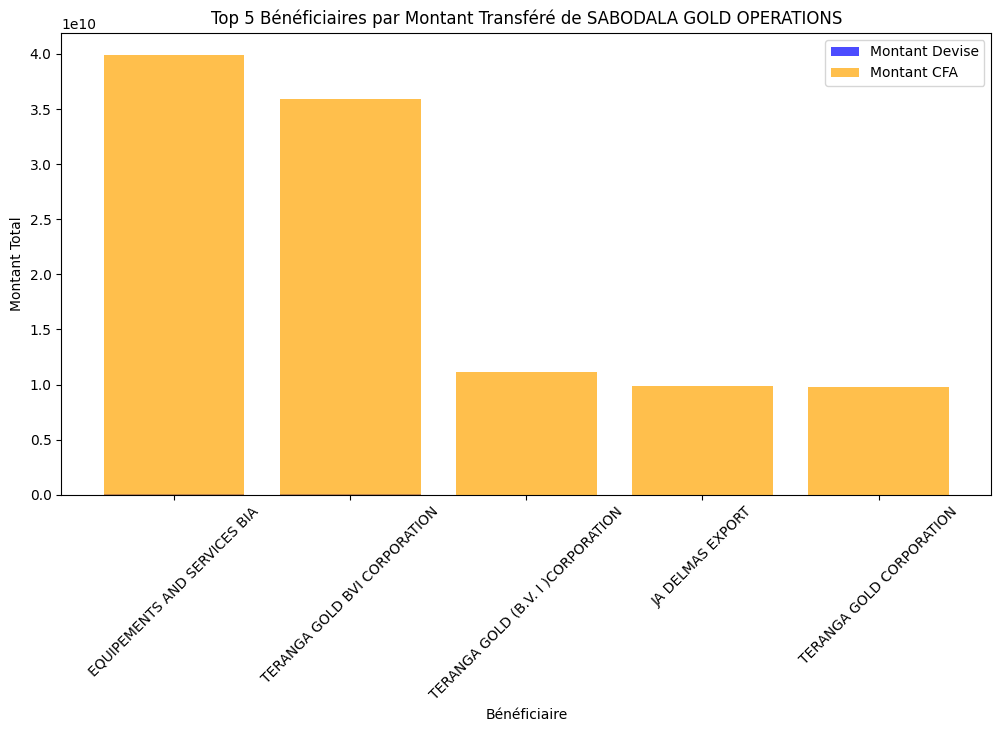

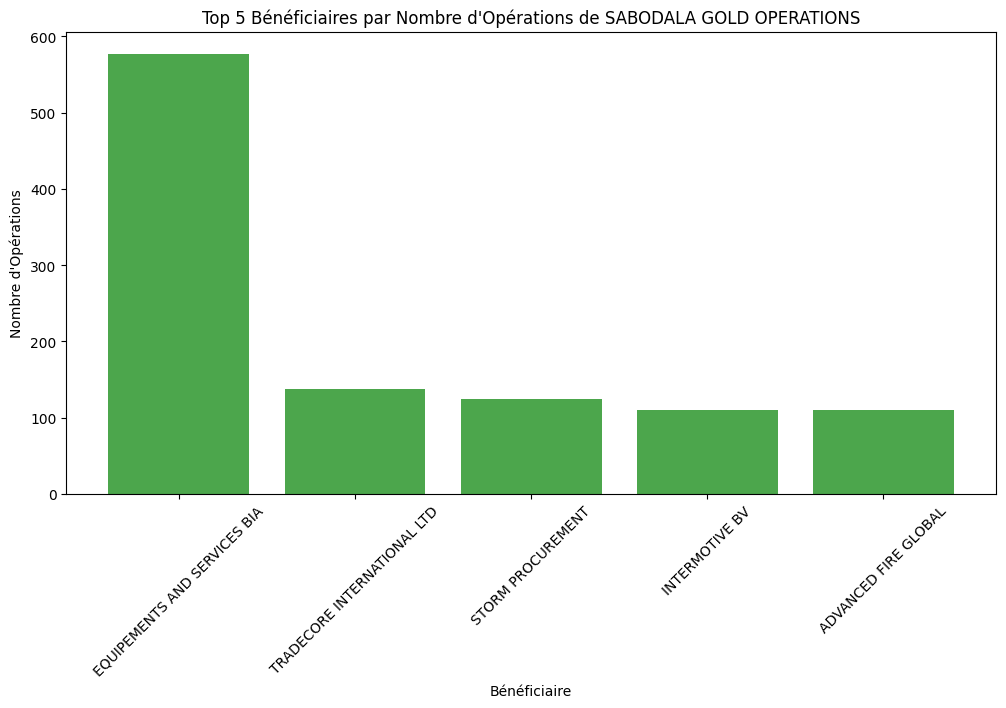

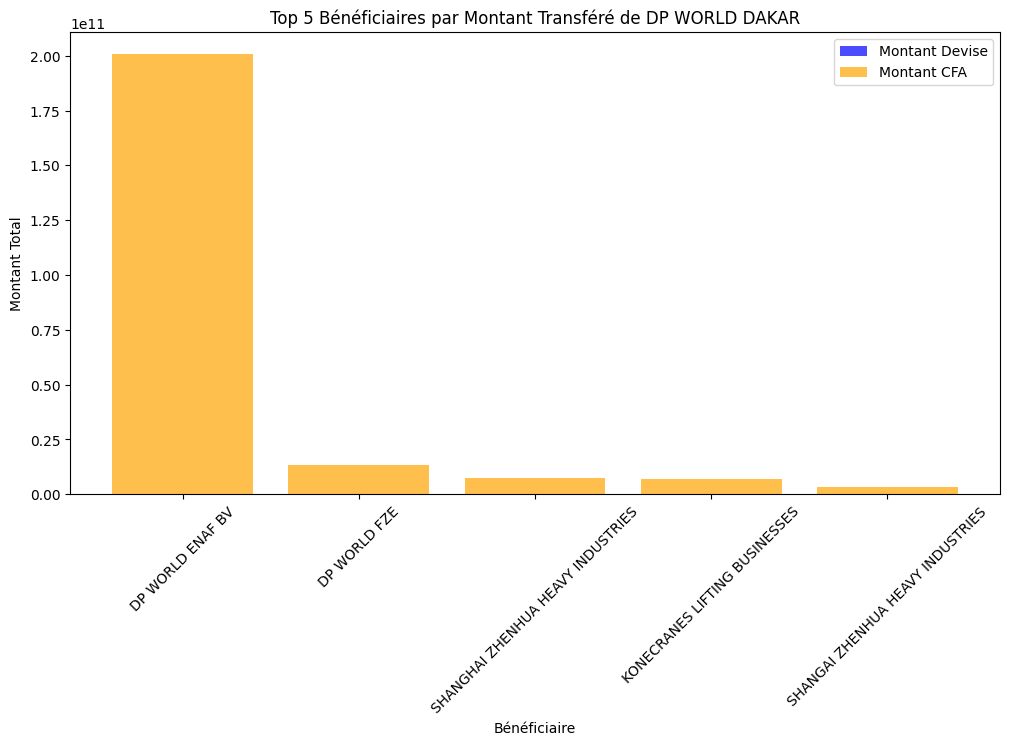

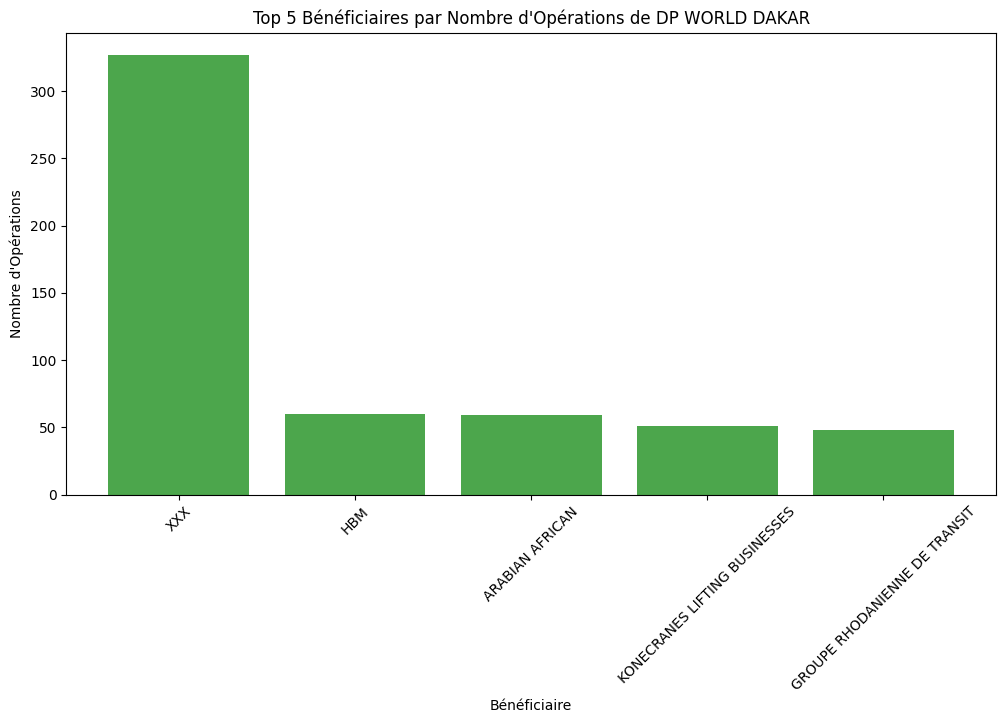

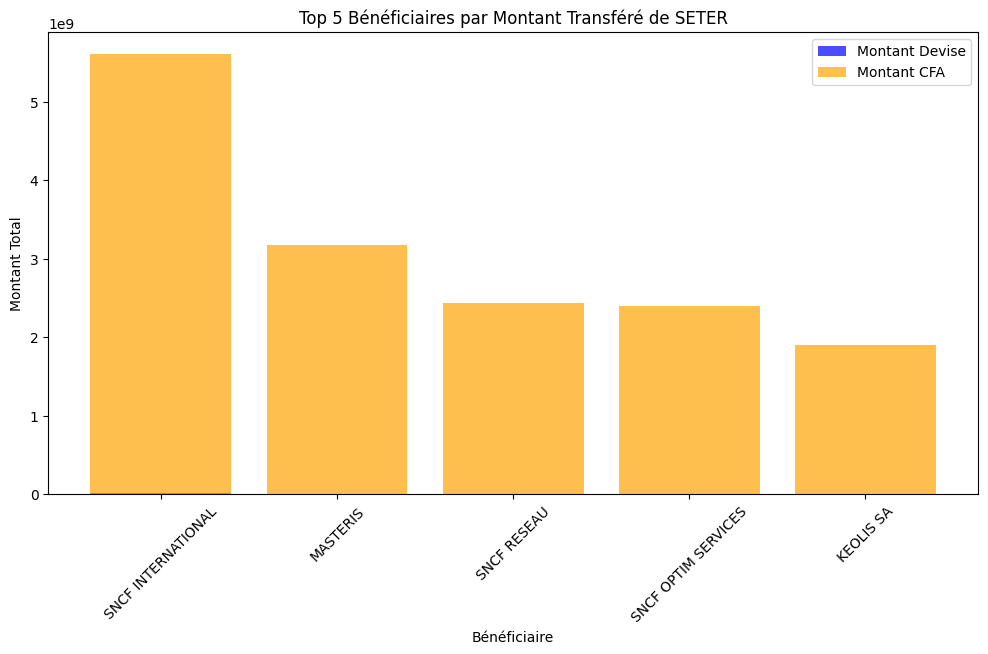

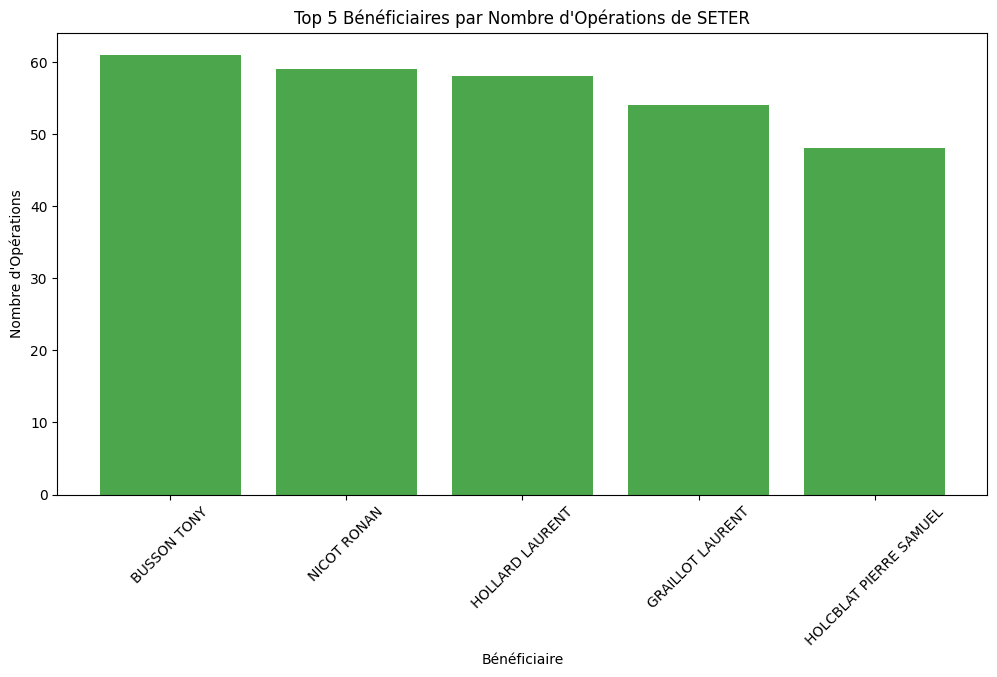

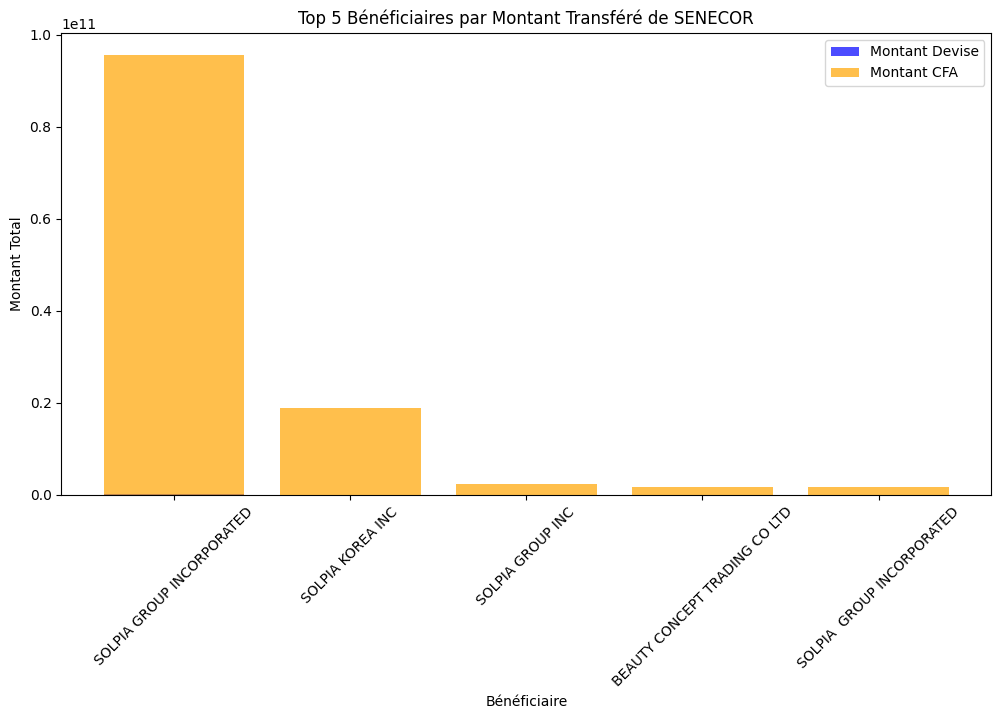

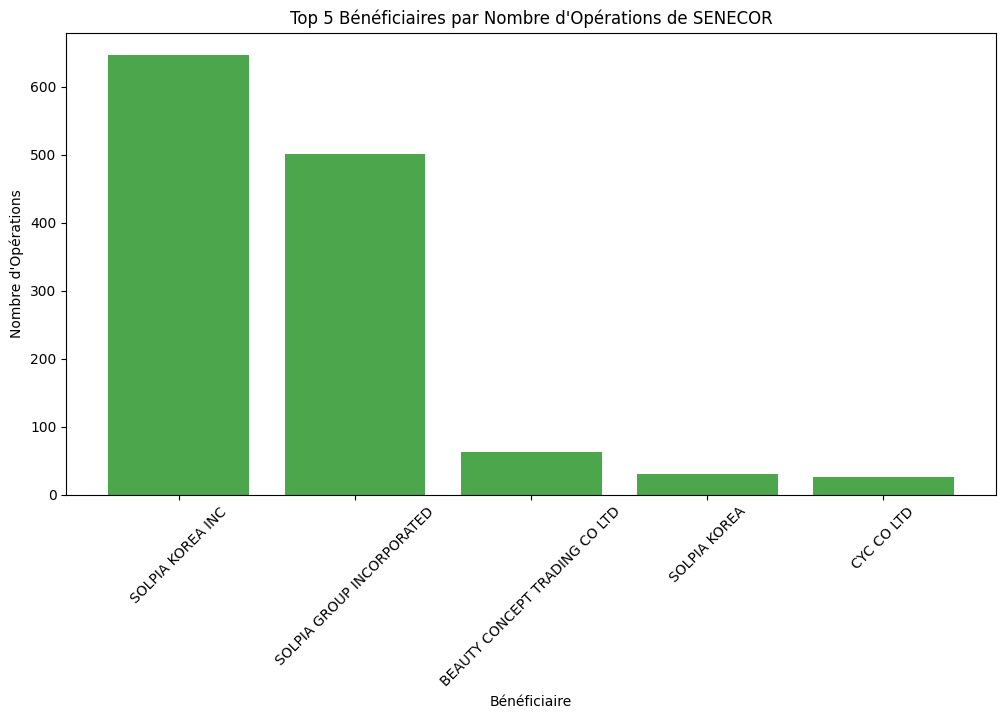

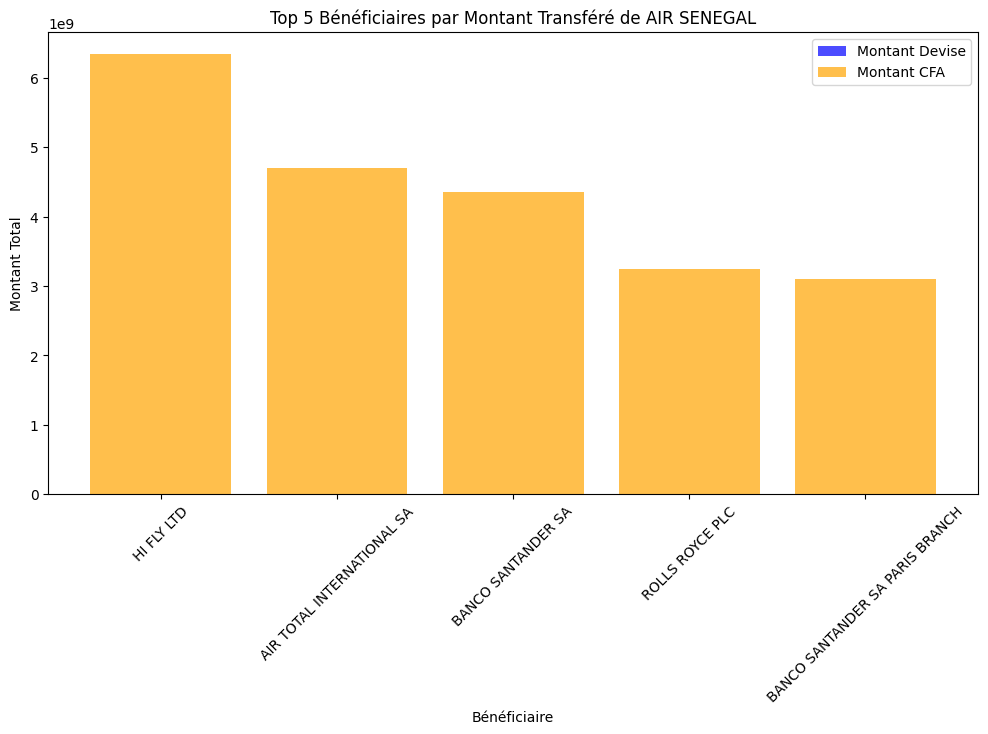

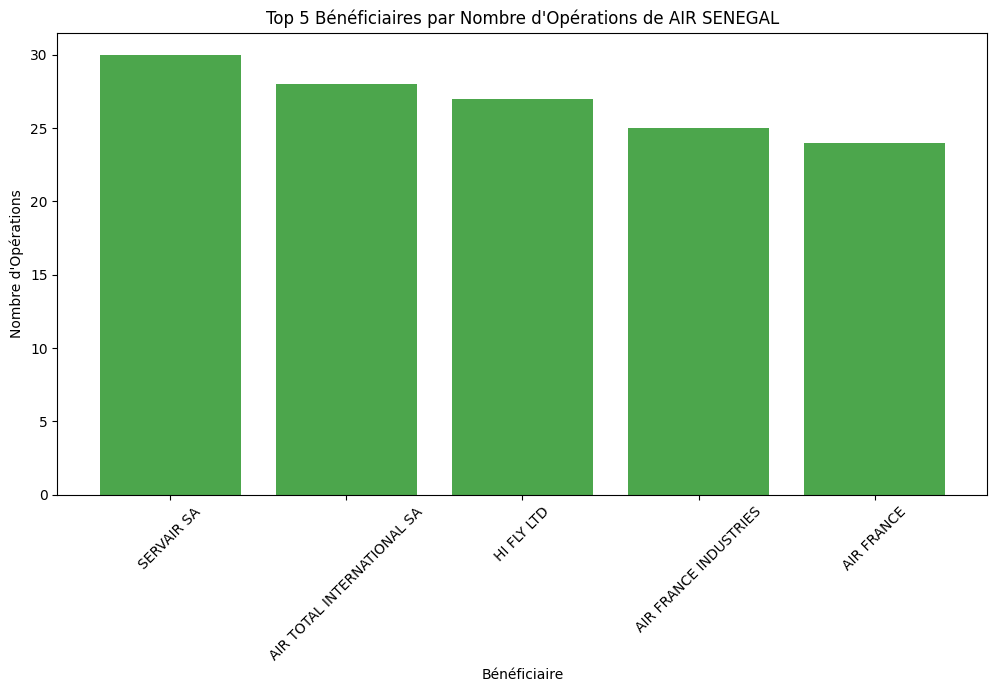

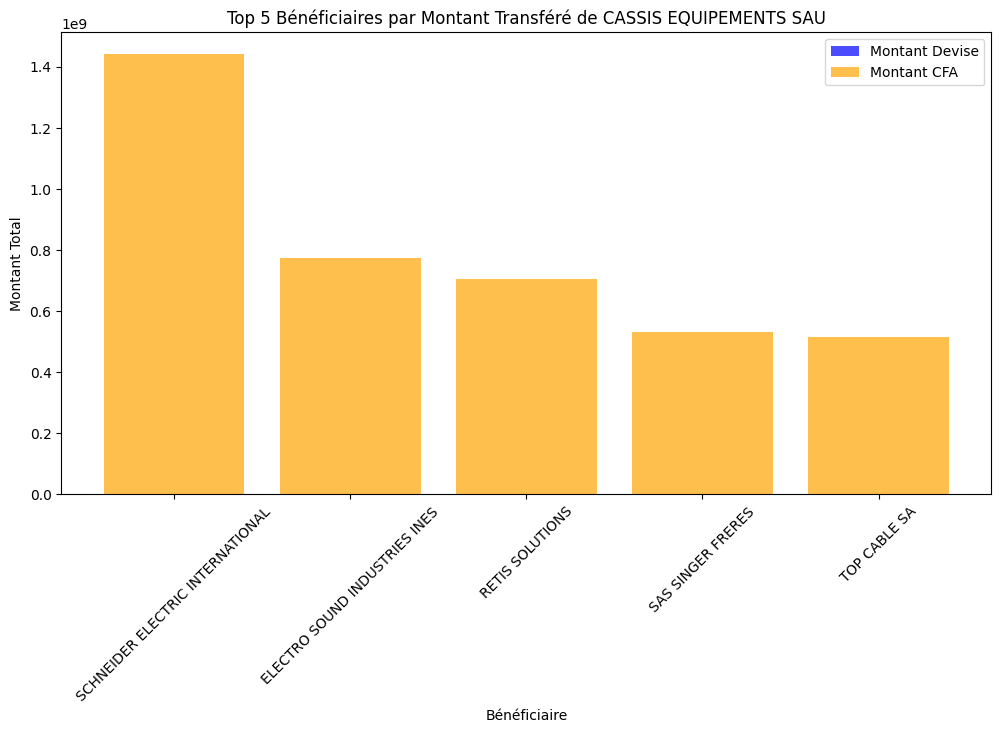

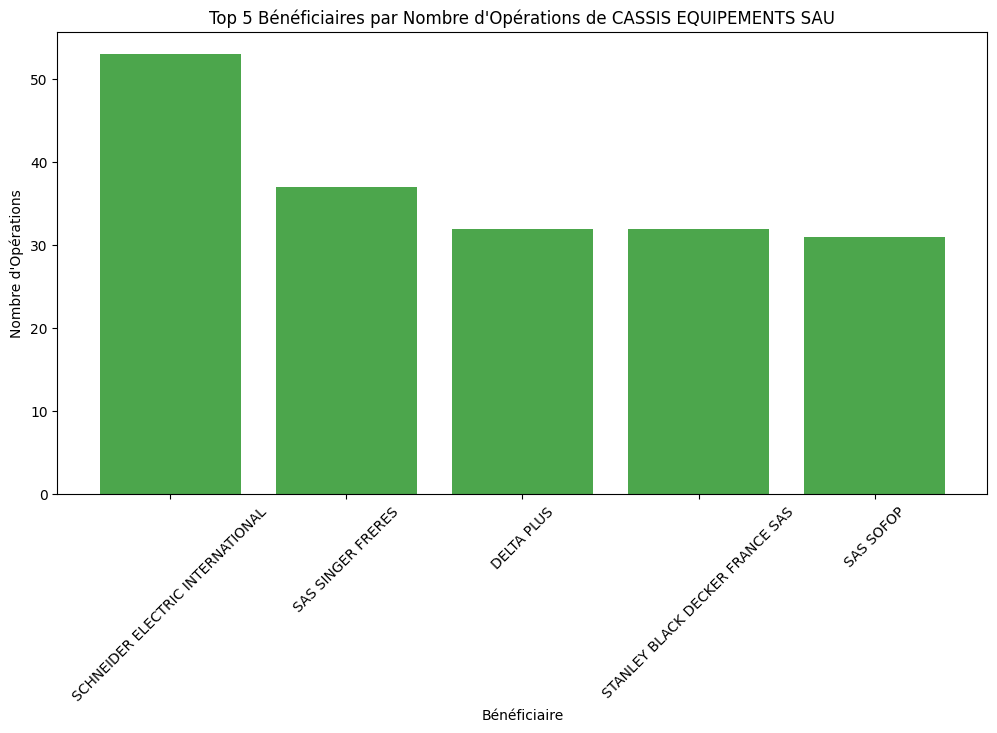

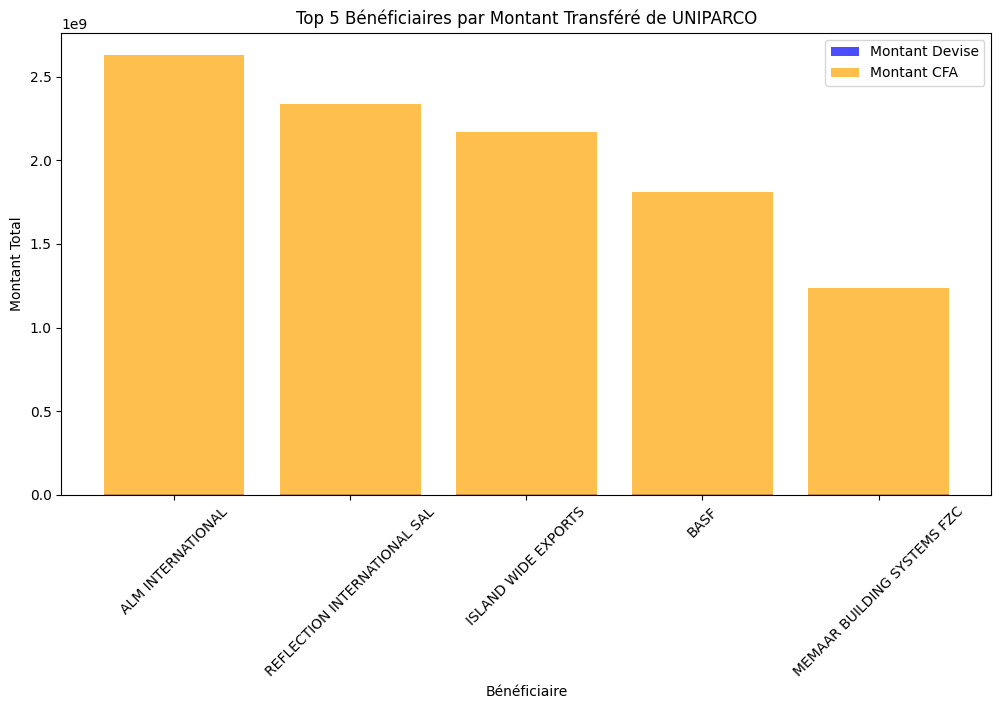

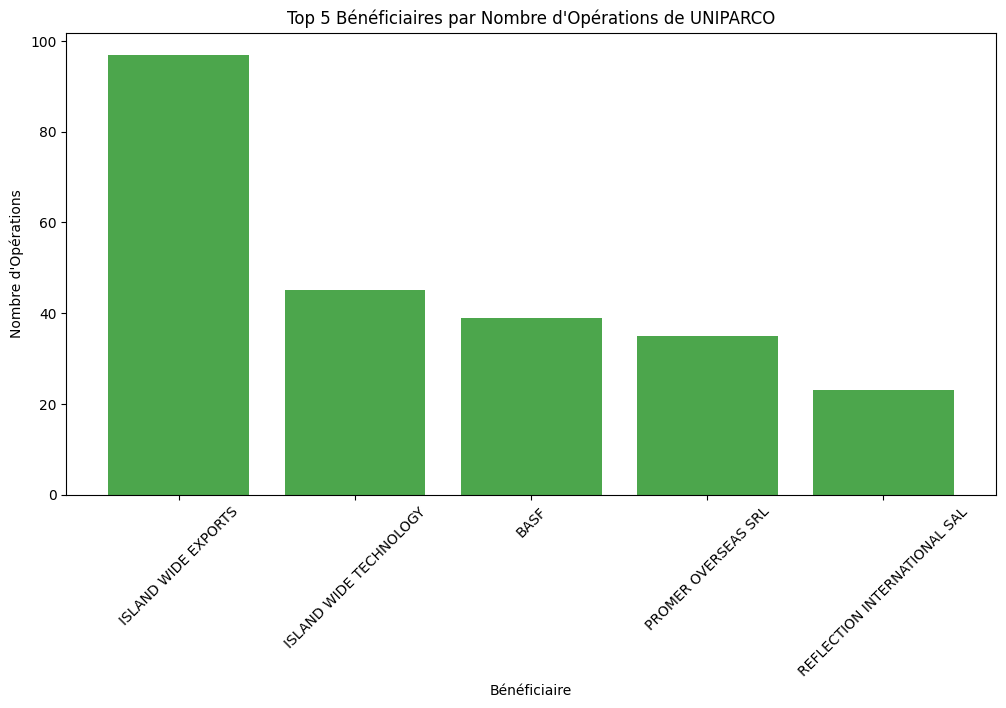

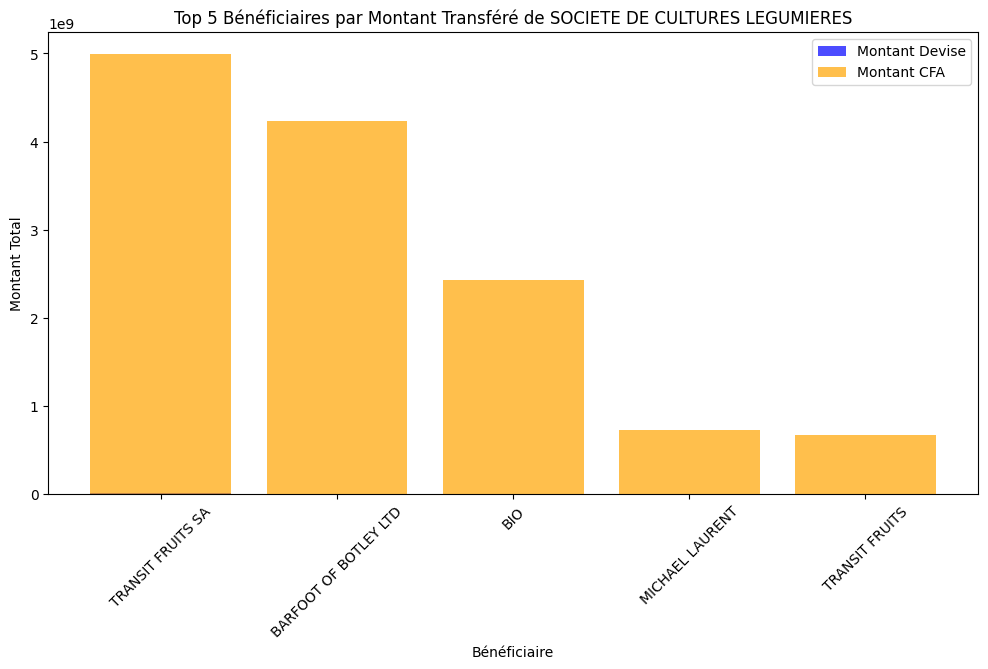

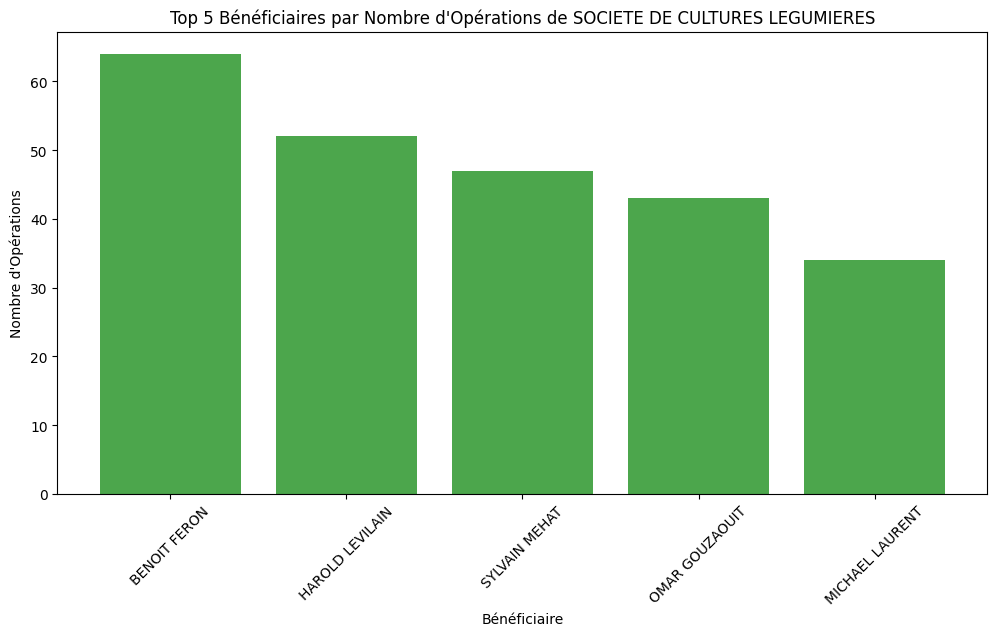

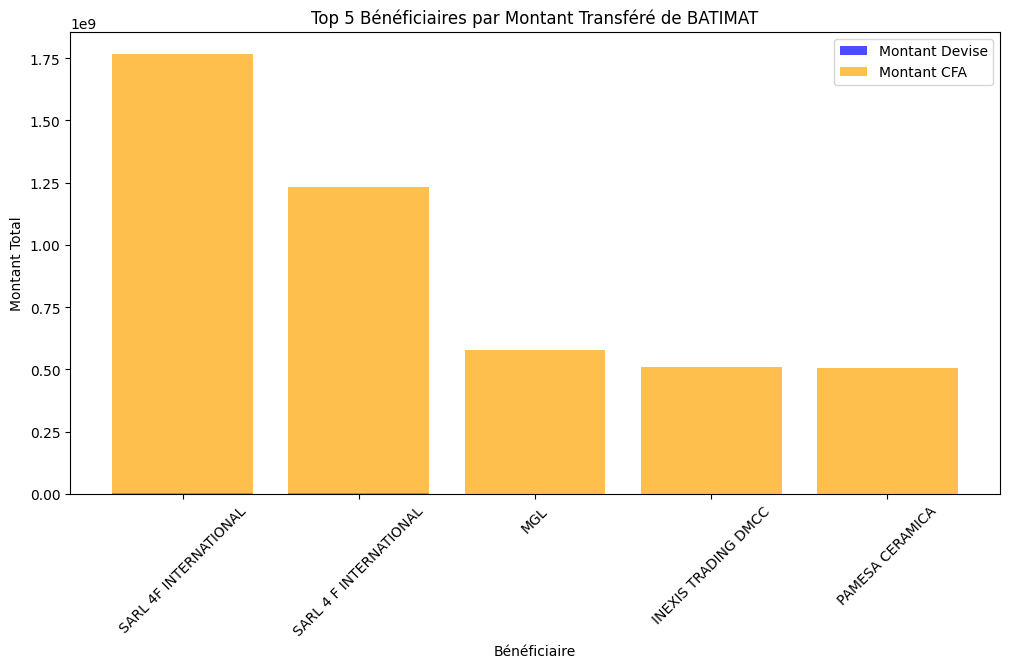

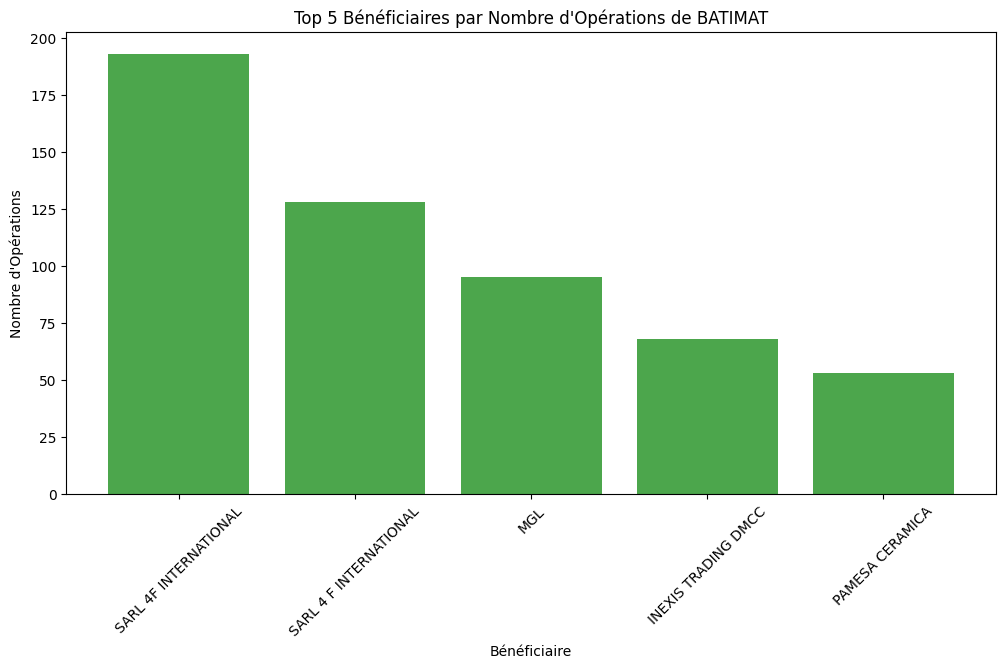

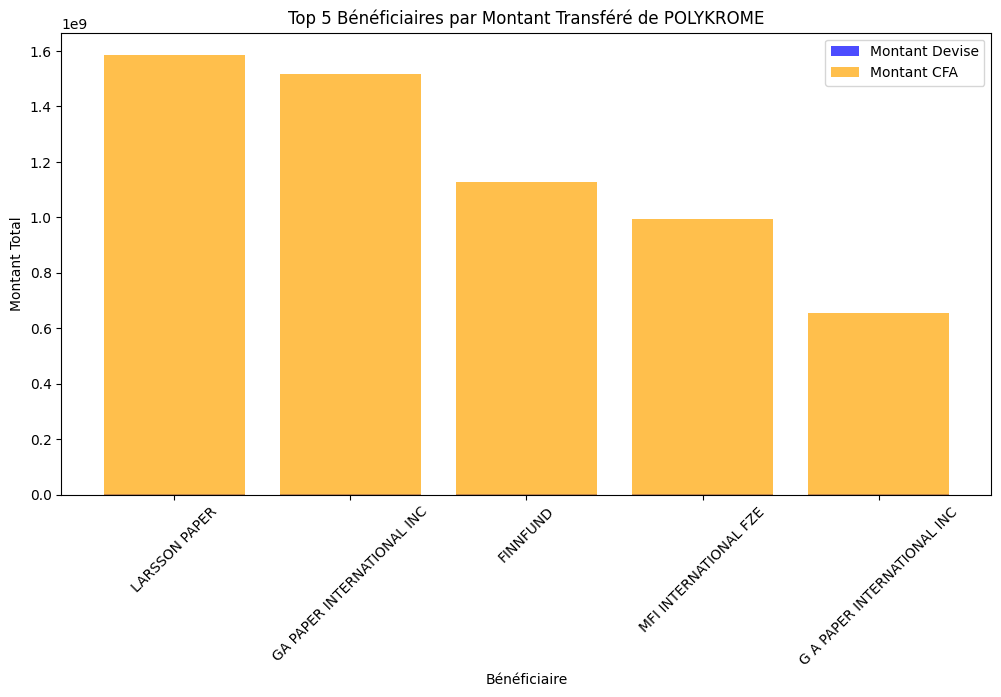

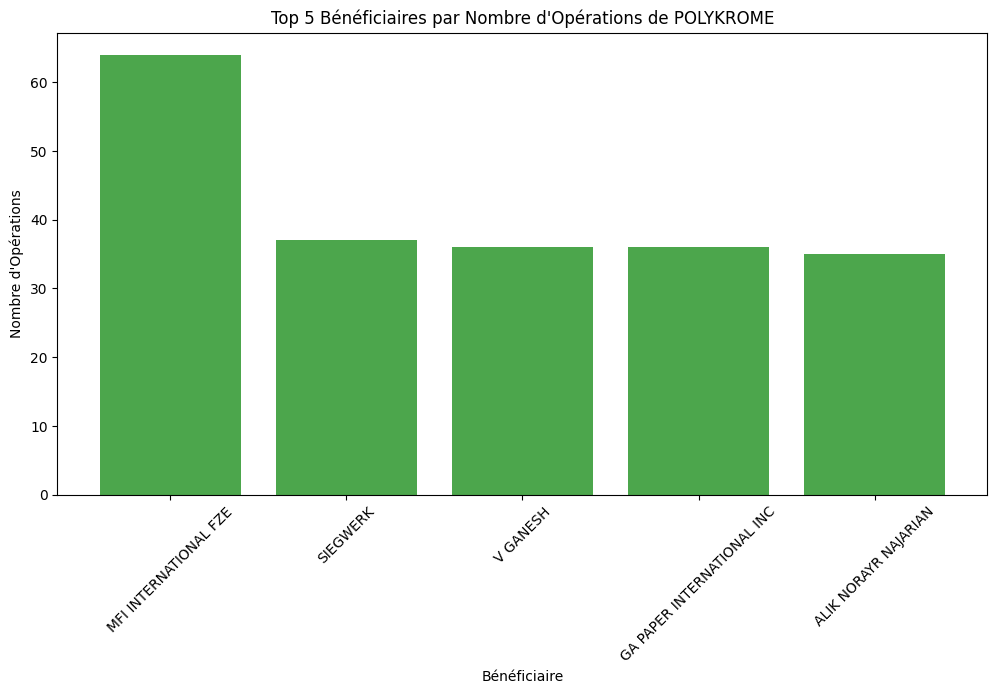

In [27]:
# Étape 7 : Visualisation des montants transférés et du nombre d'opérations pour les principaux bénéficiaires
for orderer in top_orderers.index:
    orderer_beneficiaries_amount = top_beneficiaries_by_amount[top_beneficiaries_by_amount['nomdo'] == orderer]
    orderer_beneficiaries_operations = top_beneficiaries_by_operations[top_beneficiaries_by_operations['nomdo'] == orderer]

    plt.figure(figsize=(12, 6))
    plt.bar(orderer_beneficiaries_amount['nombf'], orderer_beneficiaries_amount['total_mdev'], color='blue', alpha=0.7, label='Montant Devise')
    plt.bar(orderer_beneficiaries_amount['nombf'], orderer_beneficiaries_amount['total_mcfa'], color='orange', alpha=0.7, label='Montant CFA')
    plt.xlabel('Bénéficiaire')
    plt.ylabel('Montant Total')
    plt.title(f'Top 5 Bénéficiaires par Montant Transféré de {orderer}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(orderer_beneficiaries_operations['nombf'], orderer_beneficiaries_operations['operation_count'], color='green', alpha=0.7)
    plt.xlabel('Bénéficiaire')
    plt.ylabel('Nombre d\'Opérations')
    plt.title(f'Top 5 Bénéficiaires par Nombre d\'Opérations de {orderer}')
    plt.xticks(rotation=45)
    plt.show()


In [28]:
# Recommandations de services pour les principaux bénéficiaires

print("\nRecommandations de Services pour les Principaux Bénéficiaires des Principaux Ordonnateurs :")

# 1. Services de gestion de trésorerie
print("1. Services de gestion de trésorerie : Offrir des services de gestion de trésorerie personnalisés pour aider les bénéficiaires à optimiser la gestion de leurs liquidités et à améliorer leur efficacité financière.")

# 2. Solutions de change et couverture des risques
print("2. Solutions de change et couverture des risques : Proposer des services de change et des solutions de couverture des risques pour les bénéficiaires effectuant des transactions en devises étrangères.")

# 3. Financement des importations et exportations
print("3. Financement des importations et exportations : Offrir des solutions de financement pour soutenir les bénéficiaires dans leurs opérations d'importation et d'exportation.")

# 4. Services de conseil en commerce international
print("4. Services de conseil en commerce international : Fournir des conseils et des services de soutien pour les bénéficiaires impliqués dans le commerce international, afin de les aider à naviguer dans les réglementations et à maximiser leurs opportunités de croissance.")

# 5. Offres groupées de produits et services bancaires
print("5. Offres groupées de produits et services bancaires : Proposer des offres groupées comprenant des comptes d'entreprise, des services de paiement, et des prêts commerciaux à des conditions avantageuses pour les bénéficiaires clés.")


Recommandations de Services pour les Principaux Bénéficiaires des Principaux Ordonnateurs :
1. Services de gestion de trésorerie : Offrir des services de gestion de trésorerie personnalisés pour aider les bénéficiaires à optimiser la gestion de leurs liquidités et à améliorer leur efficacité financière.
2. Solutions de change et couverture des risques : Proposer des services de change et des solutions de couverture des risques pour les bénéficiaires effectuant des transactions en devises étrangères.
3. Financement des importations et exportations : Offrir des solutions de financement pour soutenir les bénéficiaires dans leurs opérations d'importation et d'exportation.
4. Services de conseil en commerce international : Fournir des conseils et des services de soutien pour les bénéficiaires impliqués dans le commerce international, afin de les aider à naviguer dans les réglementations et à maximiser leurs opportunités de croissance.
5. Offres groupées de produits et services bancaires : 

: 